# Bank Marketing Data Science Solution
In this notebok, will be presented step-by-step analysis, explaining each step for the best understanding problem and solution.<br /><br />
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.<br /><br />
Benefit of creating model should be to increase the efficiency of the choice of customers to whom the offer will be presented what it means separating group of customers who can be targeted with specific offer.<br /><br />

## Workflow stages<br />

In this notebook, workflow goes through six stages:

1. Definition of problem. 
2. Obtaining data.
3. Analyze, identify patterns and explore the data.
4. Prepare and cleanse the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.

Additionally, we may combine workflow stage, for example analyze by visualizing data.
Also stage may perform multiple times, for example visualizing data.

Based on dataset, our model, creating in this notebook, should predict if the client will subscribe a term deposit.<br /><br />

## Workflow goals<br />

To better undestanding proccess our analysis, below, main goals were presented. There are steps which we should always use.

There is a couple of main goals:<br />

**Classifying:**<br />

We may classify or categorize our sample.<br />

**Correlating:**<br />

Witch feature in our dataset significantly affect to our goal? Is there correlation amont feature and goal or features? This can be tested for numberical (function corr()) and categorical features (function phik_matrix() - it will be explained during analysis). Correlating may help in creating or correcting features.<br />

**Converting:**<br />

All features have to be converted to numerical values. For example text variables converting to numeric.<br />

**Completing:**<br />

Data mostly have missing values so it require us to fill any missing value in features. Thanks to this, model may work best.<br />

**Correcting:**<br />

We may analyze dataset for possible error or outliers and remove samles. Also we can discard if this feature skew the results.<br />

**Creating:**<br />

We may create new features based on existing feature.<br />

**Charting:**<br />

Selecting the right visualisaton plots and charts.

## Description of dataset<br />

### Data consists of 20 inputs which we can separate to:<br />
**Bank client data:**

1. age
2. job : type of job
3. marital : marital status
4. education: type of education
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan<br />

**Related with the last contact of the current campaign:**

8. contact: contact communication type
9. month: last contact month of year
10. day_of_week: last contact day of the week
11. duration: last contact duration, in seconds<br />

**Other attributes:**

12. campaign: number of contacts performed during this campaign and for this client)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign
14. previous: number of contacts performed before this campaign and for this client
15. poutcome: outcome of the previous marketing campaign<br />

**Social and economic context attributes**

16. emp.var.rate: employment variation rate
17. cons.price.idx: consumer price index
18. cons.conf.idx: consumer confidence index
19. euribor3m: euribor 3 month rate
20. nr.employed: number of employees<br /><br />

###  1 output (target)
21. y - has the client subscribed a term deposit?

In [1]:
# data analysis
import pandas as pd
import numpy as np
import phik

# visualisaton
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

# machine learning
import optuna

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, log_loss
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
# setting base information for visualization
pd.options.display.max_colwidth = 150
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

## Load Data<br />
Thanks to Pandas packages, we load data. We create copy our data to work on copy dataset. Additionally we create dataframe for names to receive quick access during our analysis.

In [3]:
data_org = pd.read_csv('Datasets/bank-additional-full.csv', sep=';')
names_org = pd.read_csv('Datasets/Names.txt', sep='\t', header=None)

In [4]:
# Creating copy of data not to work on original data
data = data_org.copy(deep=True)
names = names_org.copy(deep=True)

In [5]:
# Creating of dataframe of names to receive fast access to name of columns
#during analysis 
names = names[0].str.split(' - |:', n=2).apply(lambda x: x[1:]).to_frame()
names['Column'] = names[0].apply(lambda x: x[0])
names['Explanation'] = names[0].apply(lambda x: x[1])
names.drop(0, axis=1, inplace=True)
names.index += 1
names

,Column,Explanation
1,age,(numeric)
2,job,"type of job (categorical: ""admin."",""blue-collar"",""entrepreneur"",""housemaid"",""management"",""retired"",""self-employed"",""services"",""student"",""technici..."
3,marital,"marital status (categorical: ""divorced"",""married"",""single"",""unknown""; note: ""divorced"" means divorced or widowed)"
4,education,"(categorical: ""basic.4y"",""basic.6y"",""basic.9y"",""high.school"",""illiterate"",""professional.course"",""university.degree"",""unknown"")"
5,default,"has credit in default? (categorical: ""no"",""yes"",""unknown"")"
6,housing,"has housing loan? (categorical: ""no"",""yes"",""unknown"")"
7,loan,"has personal loan? (categorical: ""no"",""yes"",""unknown"")"
8,contact,"contact communication type (categorical: ""cellular"",""telephone"")"
9,month,"last contact month of year (categorical: ""jan"", ""feb"", ""mar"", ..., ""nov"", ""dec"")"
10,day_of_week,"last contact day of the week (categorical: ""mon"",""tue"",""wed"",""thu"",""fri"")"


## Analyze by describing data<br />

Pandas helps us decsribe dataset. Now we check all available feature in our dataset.

In [6]:
print(data.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


Fist of all, rename output y to obvious name

In [7]:
data.rename(columns={'y':'term deposit'}, inplace=True)

Check number of rows and columns in our data

In [8]:
print('Dataset consists of {} rows and {} columns'.format(
    data.shape[0], data.shape[1]))

Dataset consists of 41188 rows and 21 columns


**Categorical features**

These values classify the samples into sets of similar samples.Categorical features are the values nominal, ordinal, ratio or interval.

- Categorcal: job, marital, housing, loan, contact, month, day of week, term deposit, poutcome
- Ordinal: education

**Numerical features**

These values change from sample to sample. Within numerical features are the values discrete, continuous or timeseries.

- Continous: age, duration, campaign, pdays, previos, nr.employed
- Discrete: emp.var.rate,  cons.price.idx, cons.conf.idx, euribor3m

In [9]:
# Check types of value in column
cat_col_names = data.select_dtypes(["object"]).columns
num_col_names = data.select_dtypes(["number"]).columns

print(f'Number of categorical columns: {len(cat_col_names)}, \n\
list this columns: {list(cat_col_names)}. \n\n\
Number of numeric columns: {len(num_col_names)}, \n\
list this columns: {list(num_col_names)}.')

Number of categorical columns: 11, 
list this columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'term deposit']. 

Number of numeric columns: 10, 
list this columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'].


We can conclude from the above results that half of our data is categorical (object), 
for this reason, during data cleaning and feature engineering we can check 
exactly this columns and tranform them to predict model.

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Any of features are mixed data types, all features are numeric and alphanumeric.

We can conclude base on describe of numerical values:

- mean of age is 40, as we can see, age has propably outliers (98 old),

- contact in this campaign also has outliers,

- most of the clients in this campaign had had no contact with the bank previous.

- consumer confidence index is value above 0. This can be mistake because all of values in this feature is below 0

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


We can conclude base on describe of categorical values:

- feature job has the most unique values from categorical

- freature default, housing, loan and poutcome have 3 unique values, yes, no and unknown

- term deposit is categorical with yes or no values

In [12]:
# check categorical data
data.describe(include='O').transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [13]:
for column in data.select_dtypes('object').columns:
    print(f'{column}: {data[column].unique()}')

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
term deposit: ['no' 'yes']


As we can see, categorical variables doesn't have much variation in variables so,
at this stage we can't reject some of features.

Check information about missing values (NaN) in specific columns

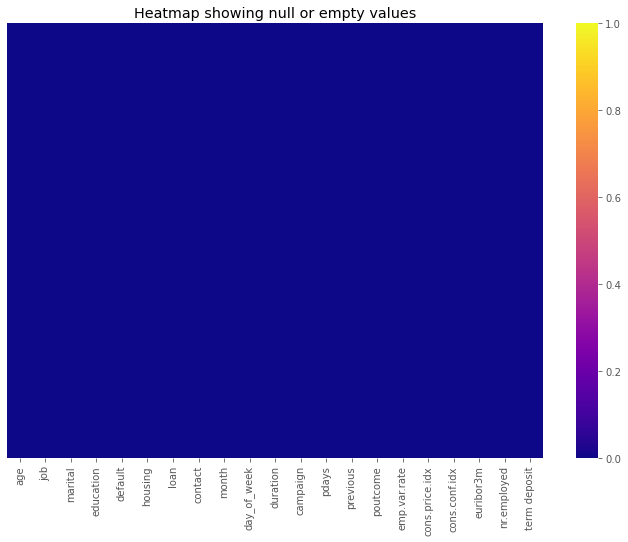

In [14]:
sns.heatmap(data.isna(), yticklabels=False, cmap='plasma', vmin=0, vmax=1)
plt.title('Heatmap showing null or empty values')
plt.show()

In [15]:
print(data.isna().sum())
data.info()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
term deposit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   mon

There we can see, our data not include missing value (NaN). Our data has missing value coded by string, during analysis we will fill it.

## Analyze by pivoting and vizualization

Make a hypothesis that overwhelming majority of answers if client subscribed
a term deposit will be 'no'.

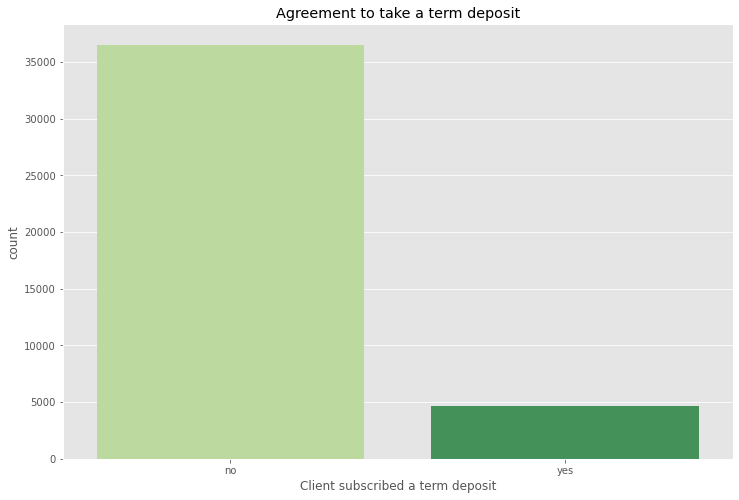

In [16]:
sns.countplot(x=data['term deposit'], palette='YlGn')
plt.xlabel('Client subscribed a term deposit')
plt.title('Agreement to take a term deposit')
plt.show()

In [17]:
data[['term deposit']].value_counts()/len(data)

term deposit
no              0.887346
yes             0.112654
dtype: float64

Countplot confirm our hypothesis. Here is not balance, so accuracy not will be
great measure, looking at accuracy, our score will should above 88%. Better option will be for example F-score, which is calculated:<br /><br />
$$F = 2 * \frac{precision * recall}{\ precision + recall}$$

### Age
In this visualization will be presented feature age, means the age of the people who were called by bank representatives.

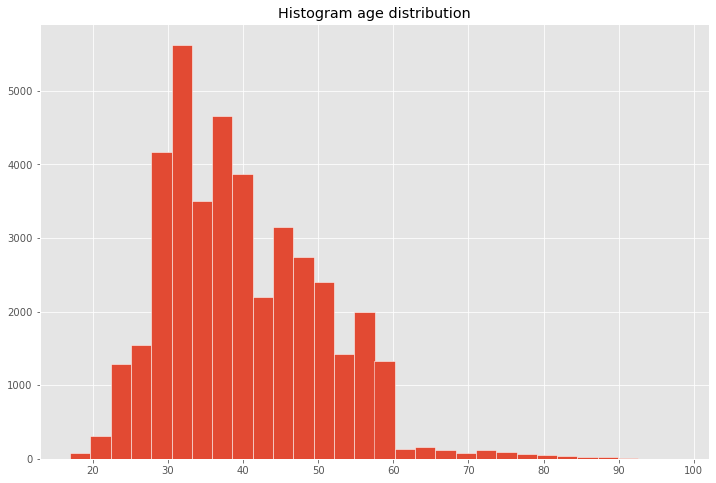

In [18]:
plt.hist(x=data['age'], bins=30, edgecolor='white')
plt.title('Histogram age distribution')
plt.show()

In [19]:
data[data['term deposit']=='yes']['age']

75       41
83       49
88       49
129      41
139      45
         ..
41174    62
41178    62
41181    37
41183    73
41186    44
Name: age, Length: 4640, dtype: int64

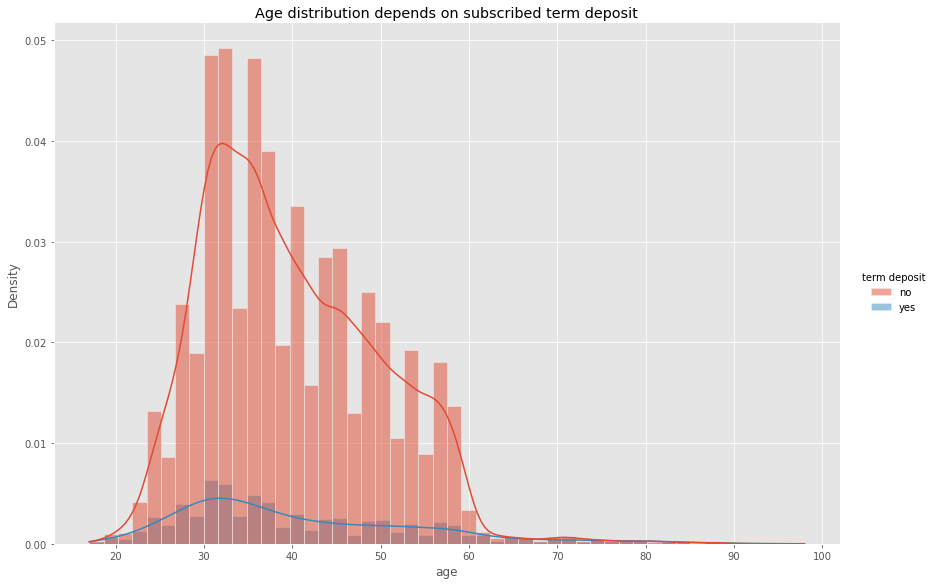

In [20]:
sns.displot(x=data['age'], kde=True, bins=50, hue=data['term deposit'], stat="density", 
            height=8, aspect=1.5)
plt.title('Age distribution depends on subscribed term deposit')
plt.show()

To see exactly how to unfolds age above 60, we create 2 plots depends on term deposit

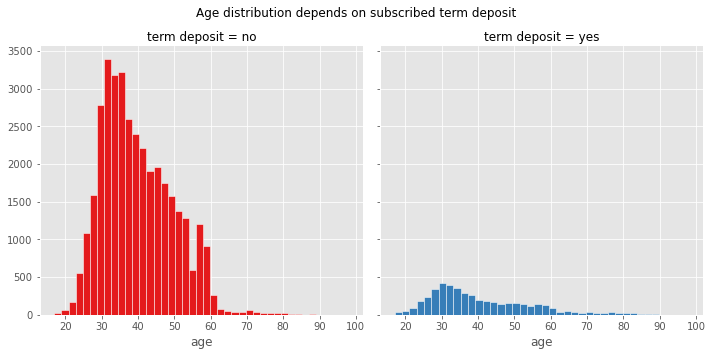

In [21]:
g = sns.FacetGrid(data, col='term deposit', hue='term deposit', height=5, palette='Set1')
g.map(plt.hist, 'age', bins=40, edgecolor='white')
g.fig.subplots_adjust(top=0.87)
g.fig.suptitle('Age distribution depends on subscribed term deposit')
plt.show()

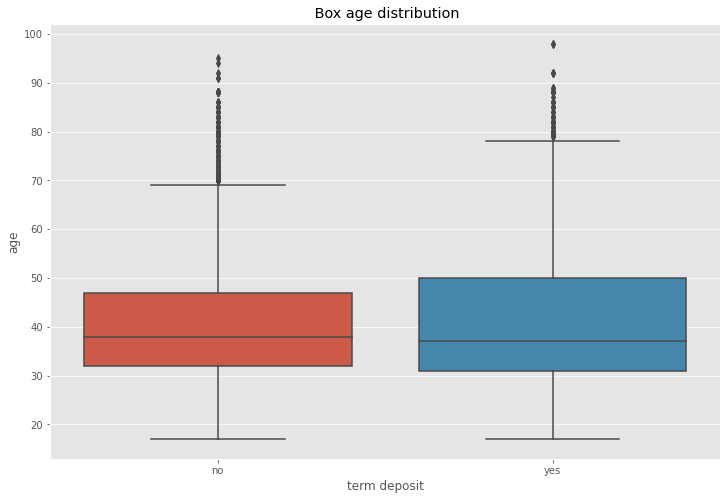

In [22]:
sns.boxplot(x='term deposit', y='age', data=data)
plt.title(' Box age distribution')
plt.show()

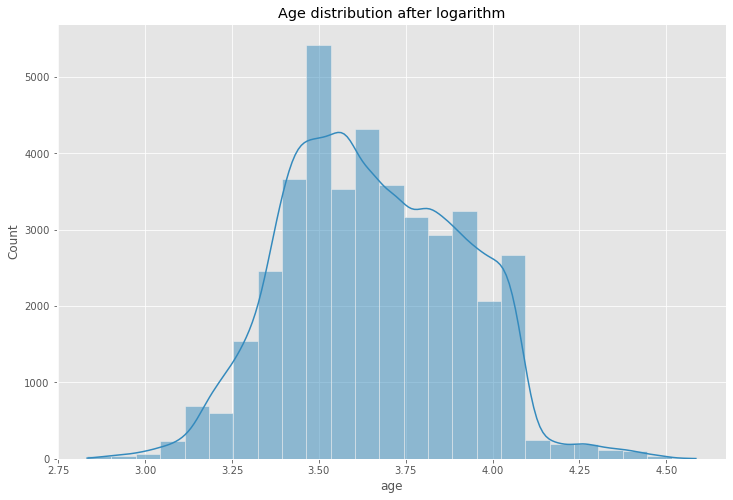

In [23]:
sns.histplot(np.log(data['age']), bins=25, kde=True)
plt.title('Age distribution after logarithm')
plt.show()

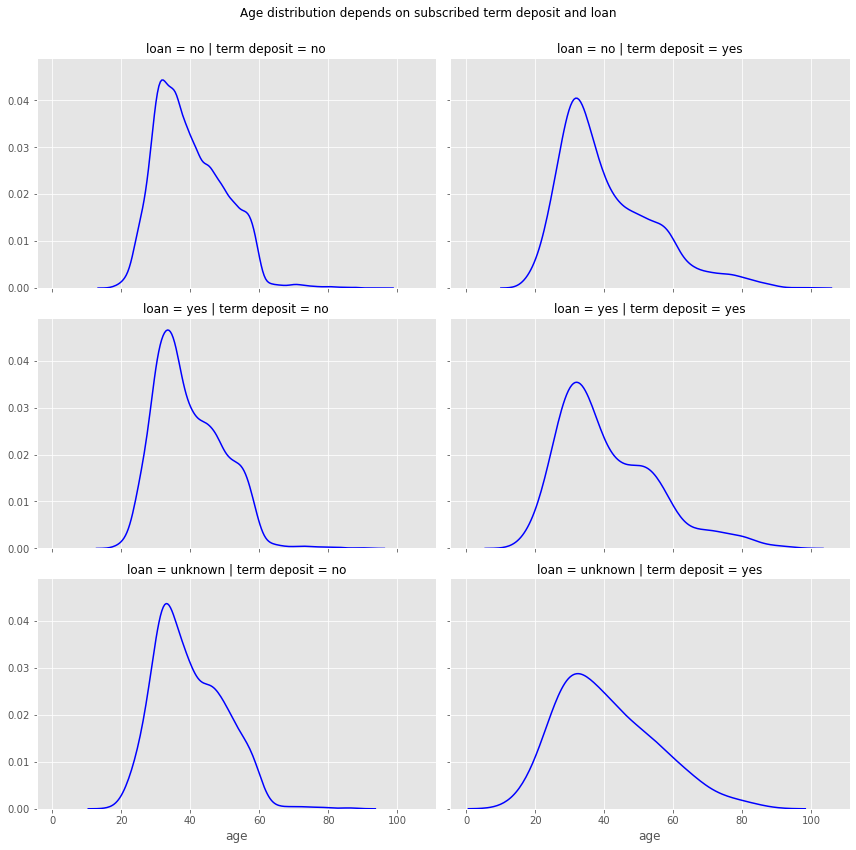

In [24]:
g = sns.FacetGrid(data=data, col='term deposit', row='loan', height=4, aspect=1.5)
g.map(sns.kdeplot, 'age', color='blue')
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Age distribution depends on subscribed term deposit and loan')
plt.show()

Observations:

- Ratio resposne yes/no is highest below 20 and above 80 age.

- Histplot of age show us that it is skewed right. Here is also a lot of outliers

- Great decision will be transofrm age by log, then data will be almost in normal distribution

- In the boxplot we can see also a lot of outliers. Additionaly, this plot shows similarity mean of age between response 'no' and 'yes'.

- Feature loan rather no affect to age and response

### Job
In this section will be presented feature job. Feature means the type of work of the people who were called by bank representatives. Value of this feature: admin., blue-collar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown.

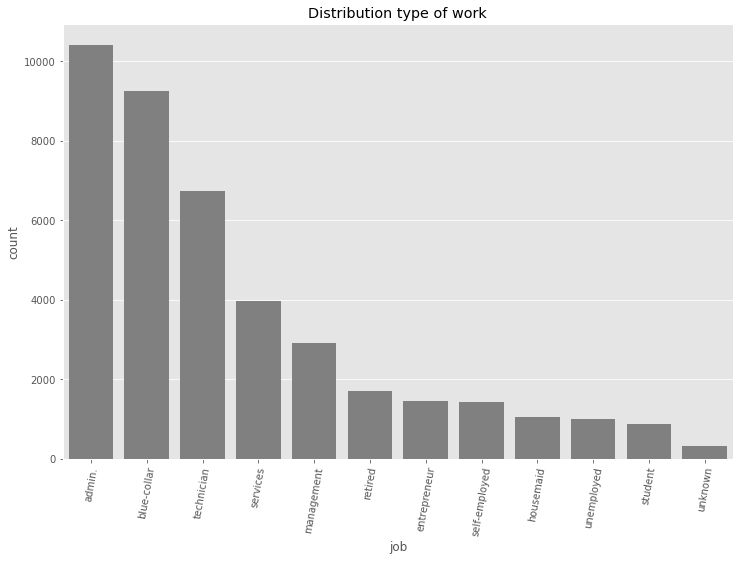

In [25]:
sns.countplot(x='job', data=data, order=data['job'].value_counts().index, 
             color='gray')
plt.title('Distribution type of work')
plt.xticks(rotation=80)
plt.show()

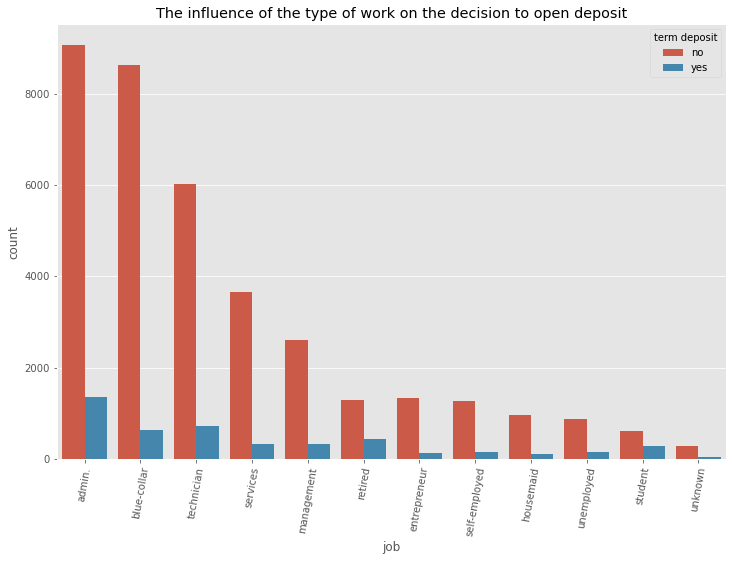

In [26]:
sns.countplot(x='job', data=data, hue='term deposit', 
              order=data['job'].value_counts().index)
plt.title('The influence of the type of work on the decision to open deposit')
plt.xticks(rotation=80)
plt.show()

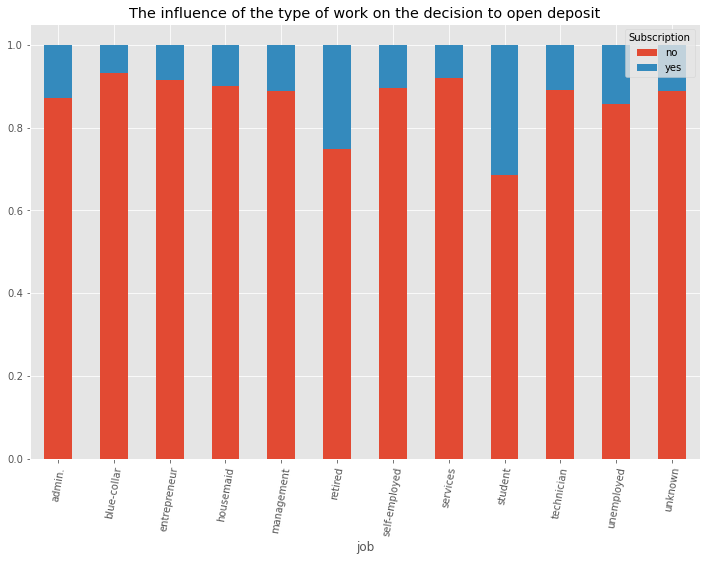

In [27]:
table = pd.crosstab(data['job'],data['term deposit'])
g = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
g.legend(loc='best', title='Subscription')
g.set_title('The influence of the type of work on the decision to open deposit')
plt.xticks(rotation=80)
plt.show()

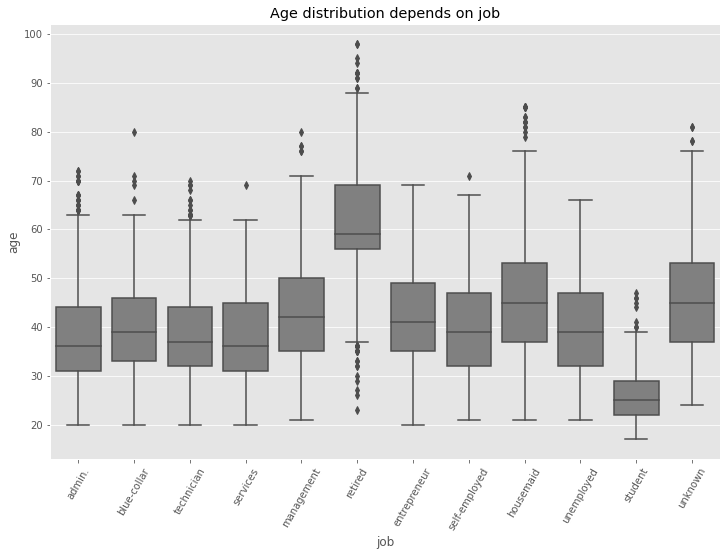

In [28]:
sns.boxplot(x='job', y='age', data=data, order=data['job'].value_counts().index,
           color='grey')
plt.xticks(rotation=60)
plt.title('Age distribution depends on job')
plt.show()

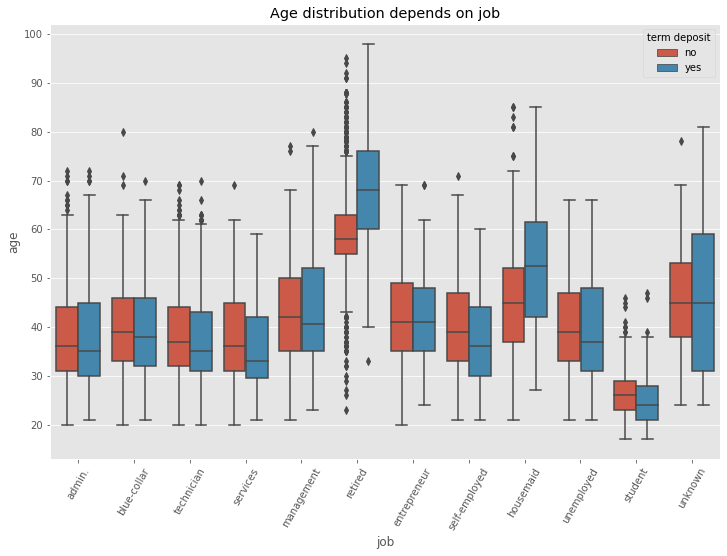

In [29]:
sns.boxplot(x='job', y='age', data=data, hue='term deposit',
              order=data['job'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Age distribution depends on job')
plt.show()

Observations:

- The most frequency job is administator

- In the plot we can notice assumed correctness as students have about 25 years
old also retired people have more years than other.

- We can notice wired outliers in retired. Of course, outliers above upper limit is understanding. Outliers below 35 years old may be error.

### Marital
Marital is feature which present us marital status people. Value of this feature: divorced, married, single, unknown.

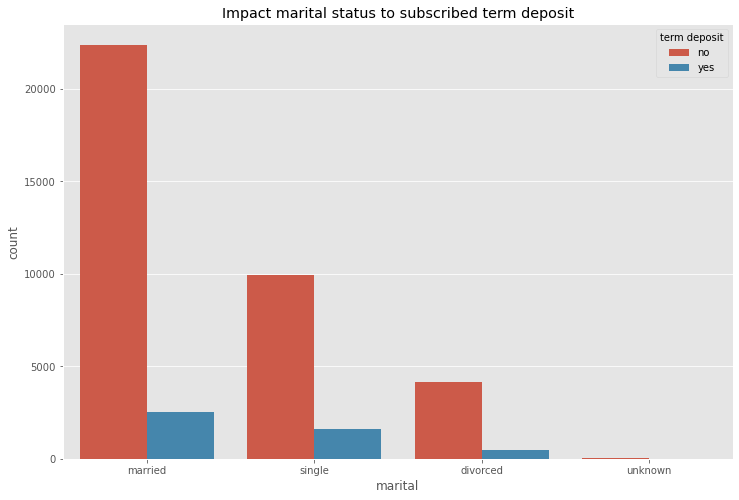

In [30]:
sns.countplot(x='marital', hue='term deposit', data=data)
plt.title('Impact marital status to subscribed term deposit')
plt.show()

In [31]:
def ratio(column):
    influence_no = data[data['term deposit'] == 'no'].groupby(
        column)['term deposit'].count()
    influence_yes = data[data['term deposit'] == 'yes'].groupby(
        column)['term deposit'].count()
    return (influence_yes/influence_no).sort_values(ascending=False)

In [32]:
print('Comparison ratio term deposit in each group in marital')
ratio('marital')

Comparison ratio term deposit in each group in marital


marital
unknown     0.176471
single      0.162847
divorced    0.115087
married     0.113056
Name: term deposit, dtype: float64

Observations:

- Base on more accurate calculate, single marital status has infuence to output.

### Contact
Feature contact consist of information about type of communication. Value of this feature: cellular, telephone.

In [33]:
data['contact'].value_counts().values

array([26144, 15044], dtype=int64)

In [34]:
def pie_char(title):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title, y=1.08)

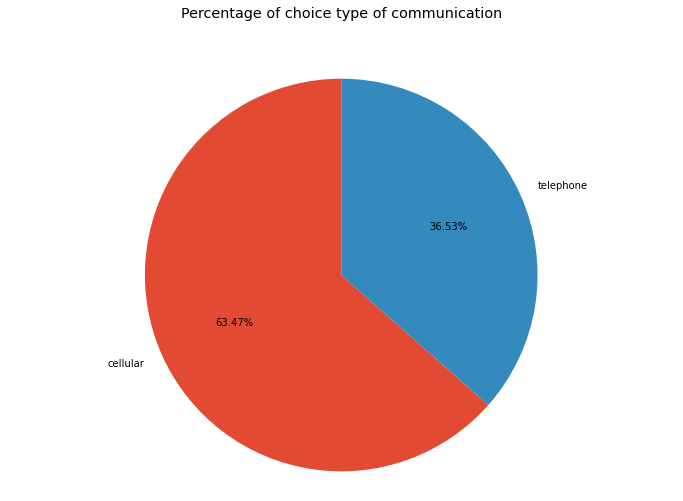

In [35]:
labels = data['contact'].value_counts().index
sizes = data['contact'].value_counts().values

pie_char('Percentage of choice type of communication')

As pie plot show, about 64% use cellular so we can conclude there are young 
people, below 40 years.

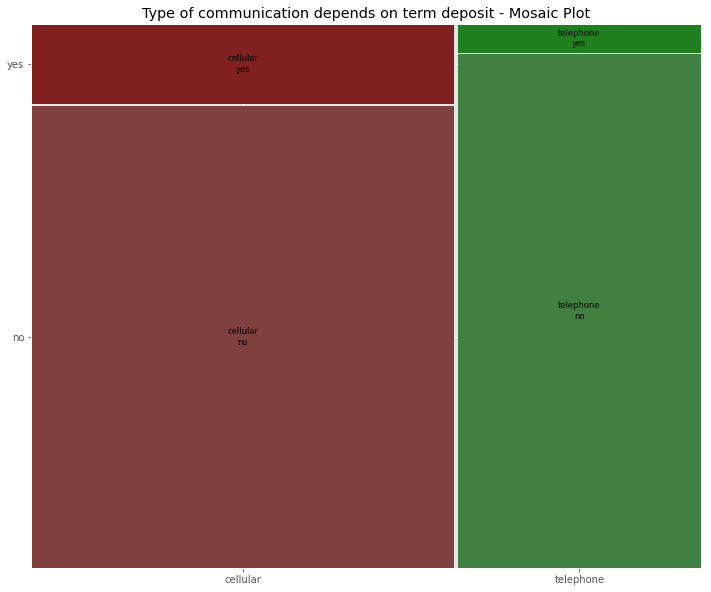

In [36]:
mosaic_contact = pd.crosstab(data['contact'], data['term deposit'])
fig, rects = mosaic(mosaic_contact.stack(), 
                   title='Type of communication depends on term deposit - Mosaic Plot')
fig.set_size_inches(12, 10)

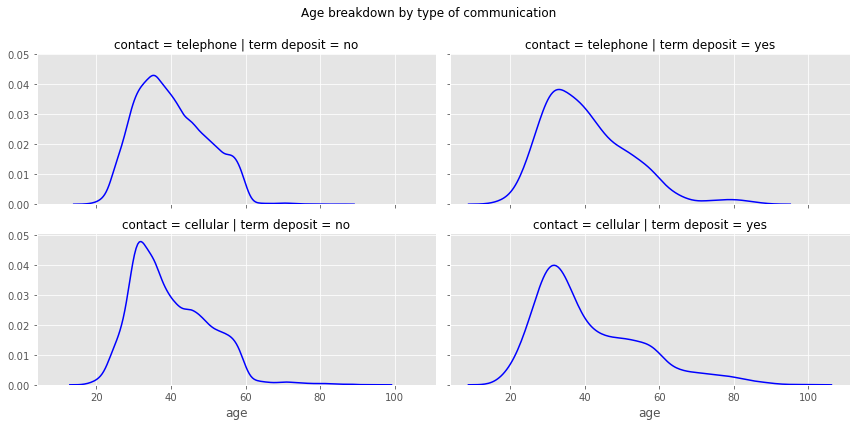

In [37]:
g = sns.FacetGrid(data=data, col='term deposit', row='contact', height=3, aspect=2)
g.map(sns.kdeplot, 'age', color='blue')
g.fig.subplots_adjust(top=0.87)
g.fig.suptitle('Age breakdown by type of communication')
plt.show()

Observation:

- Our assumption about infuence type of contact to age was wrong. Both in contact
cellular and telephone dominate pepole about 40 years.

- Only old people contact by cellular (retired people). The older it is, the more often it subscribes

### Education
This feature includes information about degree of education people. Value of this feature: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown.

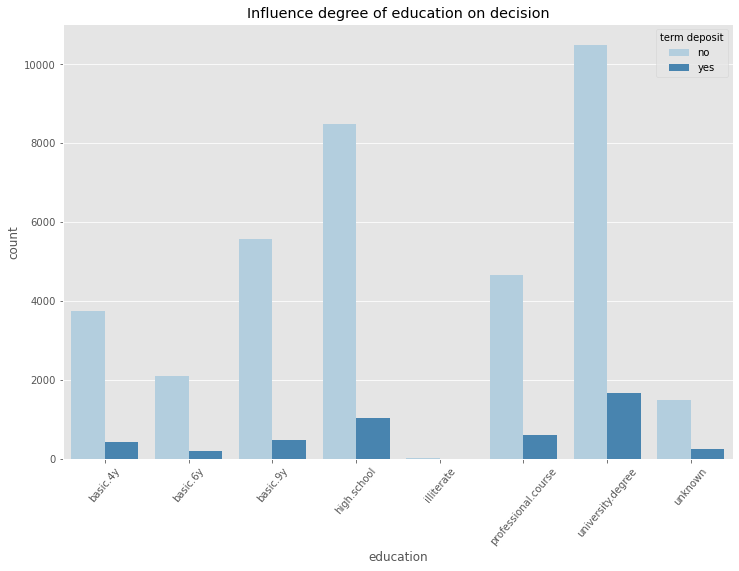

In [38]:
sns.countplot(x=data['education'], order=['basic.4y','basic.6y','basic.9y',
                            'high.school','illiterate','professional.course',
                                          'university.degree','unknown'],
              palette = 'Blues' ,hue=data['term deposit'])
plt.title('Influence degree of education on decision')
plt.xticks(rotation=50)
plt.show()

In [39]:
ratio('education')

education
illiterate             0.285714
unknown                0.169595
university.degree      0.159078
professional.course    0.128012
high.school            0.121523
basic.4y               0.114194
basic.6y               0.089354
basic.9y               0.084889
Name: term deposit, dtype: float64

Observations:

- That most of the people who were called were people with higher education (more chance to agree subscribed term deposit due to higher earnings)

- during our conclusion, we have to reject variable illiterate due to insufficient data, so the higher degree of education, the heigher propability to subscribe term deposit

### Duration
This feature includes information about last contact duration in second.

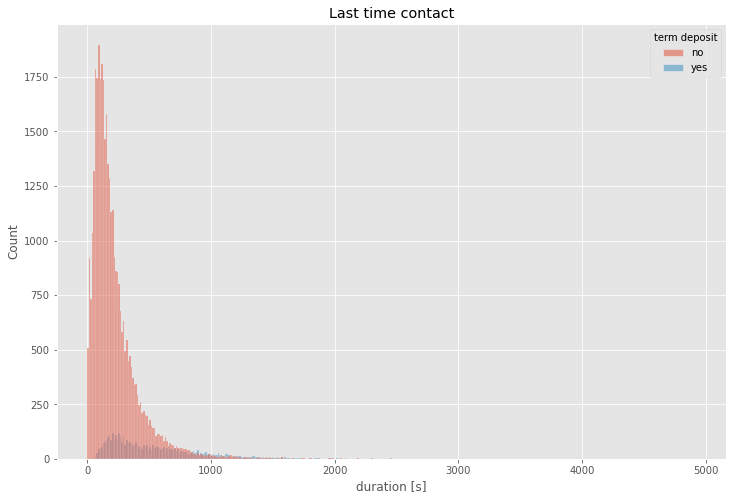

In [40]:
sns.histplot(x=data['duration'], hue=data['term deposit'])
plt.title('Last time contact')
plt.xlabel('duration [s]')
plt.show()

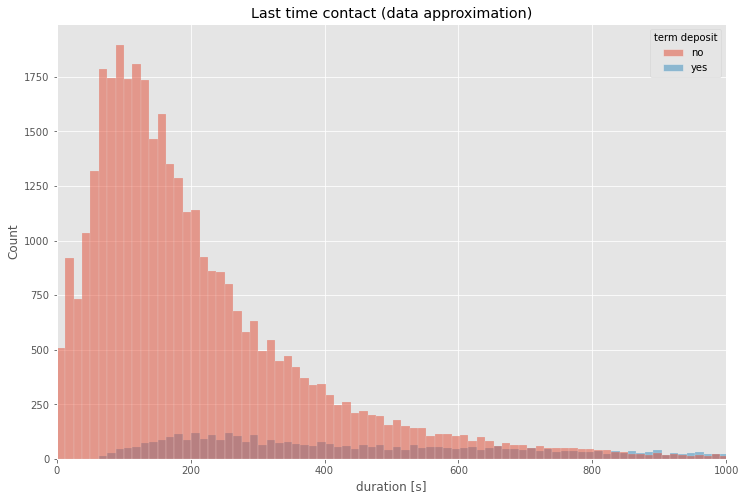

In [41]:
sns.histplot(x=data['duration'], hue=data['term deposit'])
plt.xlim(0, 1000)
plt.title('Last time contact (data approximation)')
plt.xlabel('duration [s]')
plt.show()

Distribution of last contact duration for response term deposit = 0 is skewed right. The most comon value of contact is value about 200 s. Is a lot outliers that contact leasts > 1000s. Then probably
people subscribed term deposit. Also we can see that all contact < 50s, ending 
response 'no', so like as in description, this variables highly affect to output.

### All type of credits

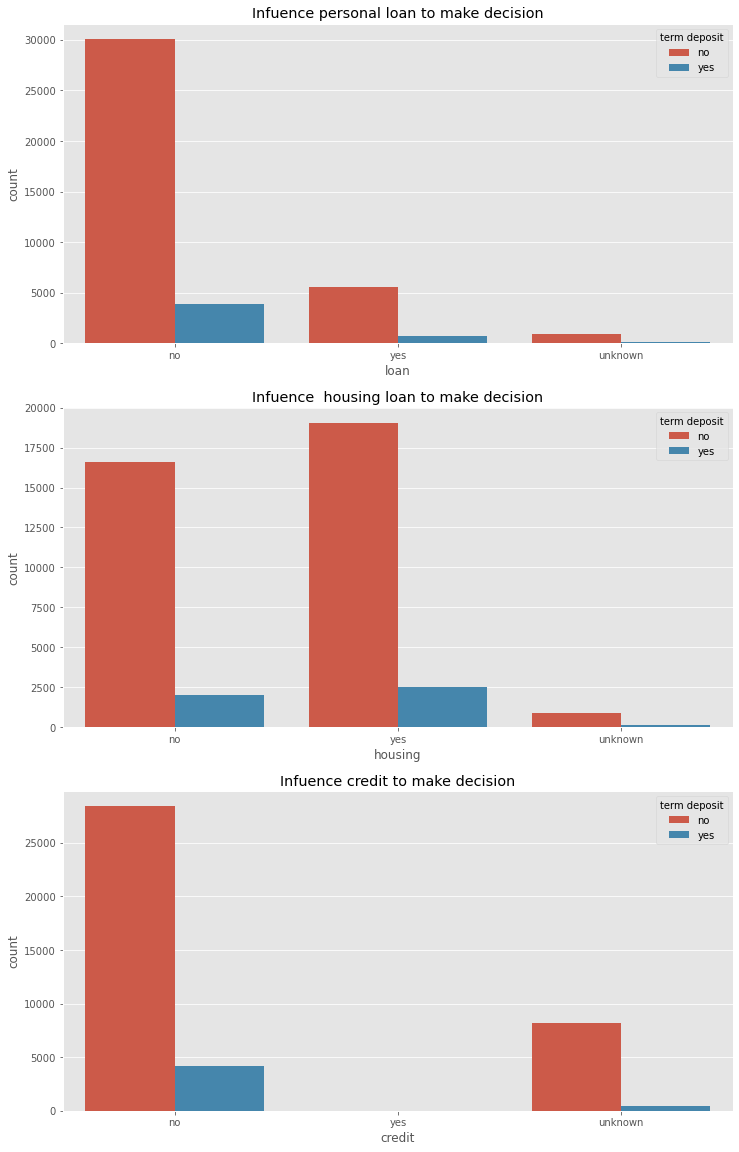

In [42]:
fig, ax = plt.subplots(3,1, figsize=(12,20))
sns.countplot(x=data['loan'], hue=data['term deposit'], ax=ax[0])
ax[0].set_title('Infuence personal loan to make decision')
sns.countplot(x=data['housing'], hue=data['term deposit'], ax=ax[1])
ax[1].set_title('Infuence  housing loan to make decision')
sns.countplot(x=data['default'], hue=data['term deposit'], ax=ax[2], order=['no', 'yes', 'unknown'])
ax[2].set_xlabel('credit')
ax[2].set_title('Infuence credit to make decision')
plt.show()

In plot we can see few response yes in column credit, so we can reject this variable

In [43]:
print('Comparison ratio term deposit in each group in loan')
print(ratio('loan'))

print('\nComparison ratio term deposit in each group in housing')
print(ratio('housing'))

Comparison ratio term deposit in each group in loan
loan
no         0.127907
yes        0.122731
unknown    0.121178
Name: term deposit, dtype: float64

Comparison ratio term deposit in each group in housing
housing
yes        0.131470
no         0.122078
unknown    0.121178
Name: term deposit, dtype: float64


None of this variables has no significant on output.

### Campaign
This feature includes information about number of contacts performed during this campaign and for client.

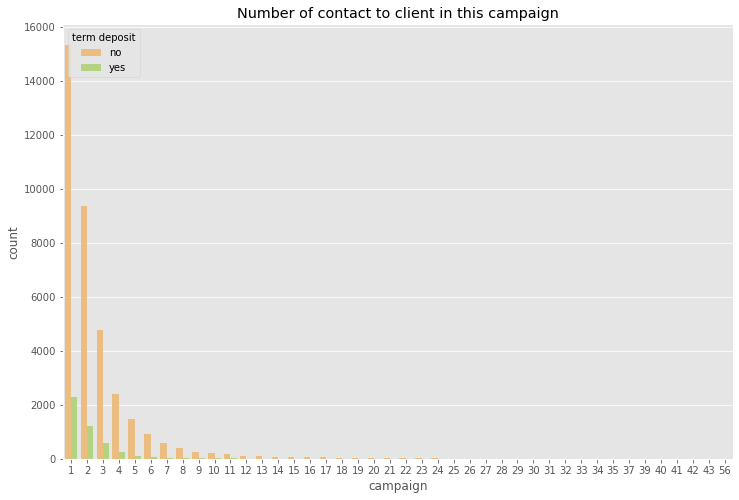

In [44]:
sns.countplot(x=data['campaign'], palette='RdYlGn', hue=data['term deposit'])
plt.title('Number of contact to client in this campaign')
plt.show()

In [45]:
data[data['campaign'] >= 15]['term deposit'].value_counts()

no     399
yes      7
Name: term deposit, dtype: int64

Observations:

- The most frequency number of contact is 1.

- All this people no subscribed term deposit. only 7 people from 408 subscribed. Propably they were
undecided or they like talk.

### Previous and campaign
Previous feature includes information about number of contacts performed before this campaign and for client.

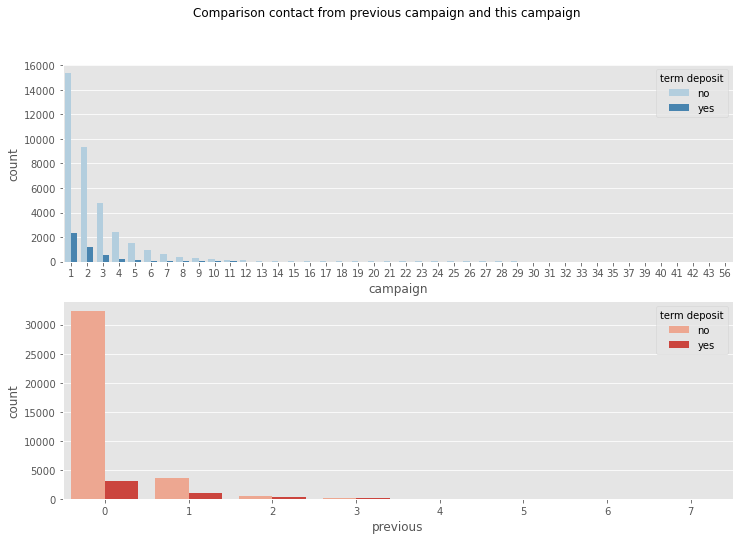

In [46]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Comparison contact from previous campaign and this campaign')
sns.countplot(x='campaign', data=data, hue='term deposit', palette='Blues', 
              ax=ax1)
sns.countplot(x='previous', data=data, hue='term deposit', palette='Reds',
              ax=ax2)
for ax in (ax1, ax2):
    ax.legend(title='term deposit', loc="upper right")
plt.show()

In [47]:
data[data['previous']>4][['previous', 'term deposit']].groupby(['term deposit'], 
                                                        as_index=False).count()

,term deposit,previous
0,no,8
1,yes,16


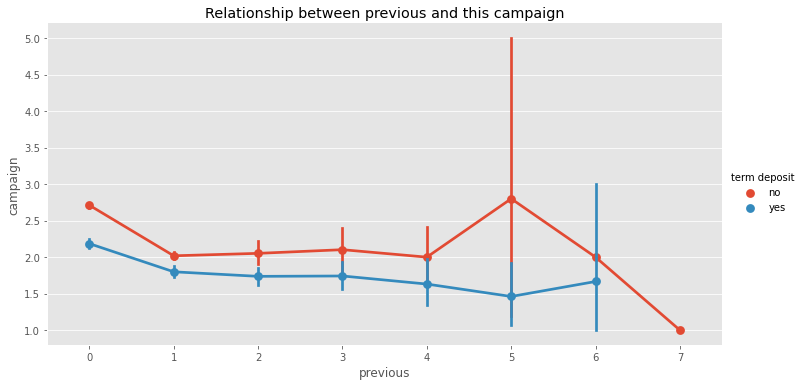

In [48]:
sns.catplot(x='previous', y='campaign', hue='term deposit', data=data, kind='point',
            hight=8, aspect=2)
plt.title('Relationship between previous and this campaign')
plt.show()

Observations

- This plot shows that in this campaign ratio resposne yes/no is heigher than in a previous campaign. Also, base on previous and this plot, we can notice that max number of contact in previous campaign was 7, in this 56.

- This is no relationship between present and previous campaign.

### Month
This feature includes information about which month was last contacted. Value of this feature: January, February, March, April, May, June, July, August, September, October, November, December.

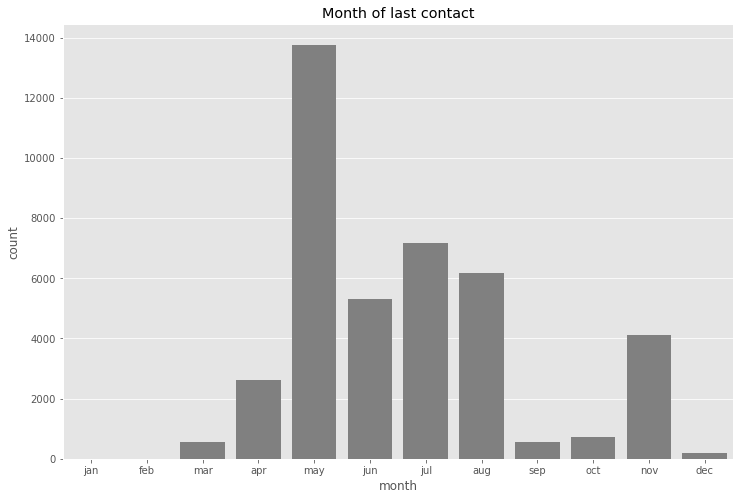

In [49]:
list_of_month = ['jan', 'feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
                 'oct', 'nov', 'dec']
sns.countplot(x=data['month'], order=list_of_month, color='grey')
plt.title('Month of last contact')
plt.show()

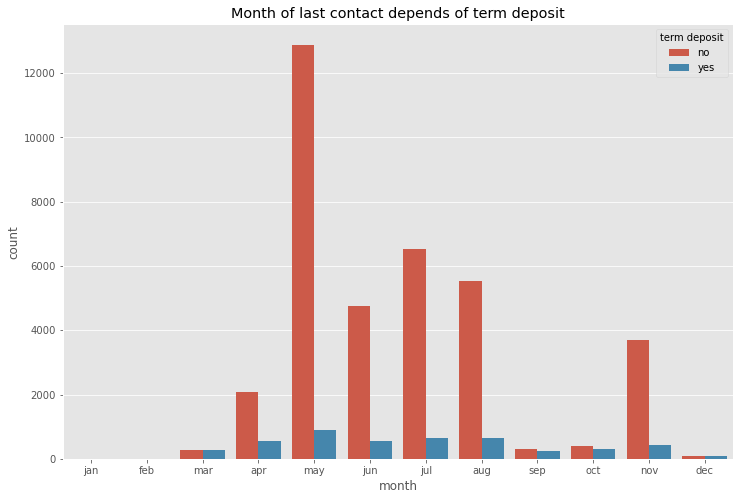

In [50]:
sns.countplot(x=data['month'], hue=data['term deposit'], order=['jan', 'feb',
    'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Month of last contact depends of term deposit')
plt.show()

Observations

- The most month of contact is may and summer months, due to higher probability of agree to subscribe

- In january and februrary, there was no contact, probably closing cases from last year

### Day of week
This feature includes information about which month was last contacted. Value of this feature: Monday, Tuesday, Wednesday, Thursday, Friday.

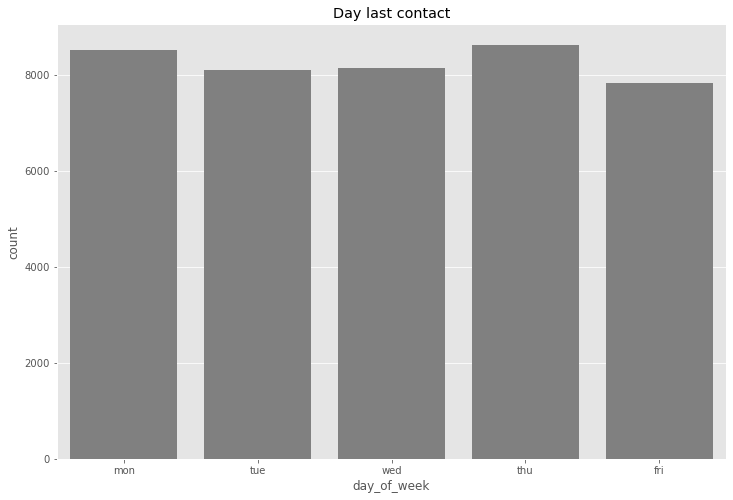

In [51]:
sns.countplot(x=data['day_of_week'], color='grey')
plt.title('Day last contact')
plt.show()

In [52]:
pd.crosstab(data['day_of_week'], data['term deposit'], margins=True, normalize=True)

term deposit,no,yes,All
day_of_week,,,
fri,0.169491,0.020540,0.190031
mon,0.186146,0.020564,0.206711
thu,0.183986,0.025371,0.209357
tue,0.173279,0.023138,0.196416
wed,0.174444,0.023041,0.197485
All,0.887346,0.112654,1.000000


Observations:

- As we can see, in feature day_od_week is only five days, these are working days. Bank doesn't work in weekend, so we don't have error in this feature.

- Distribution all value in this feature is similar, so this feature doesn't have impact to output

In [53]:
# create function to update correlation after changes
def corr_update():
    global corr_phik, corr_term
    corr_phik = data.phik_matrix(interval_cols=data.select_dtypes(
        ["number"]).columns)
    corr_term = data.phik_matrix(interval_cols=data.select_dtypes(
        ["number"]).columns)['term deposit']
    

corr_update()

### Correlation between features<br />
For the first plot we use special function form libraries phik - phik_matrix. The combined features of Phi_K form an advantage over existing coefficients. First, it works consistently between categorical, ordinal and interval variables. Second, it captures non-linear dependency. Third, it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution. These are useful features when studying the correlation matrix of variables with mixed types. It is orrelation matrix of bivariate gaussian derived from chi2-value.

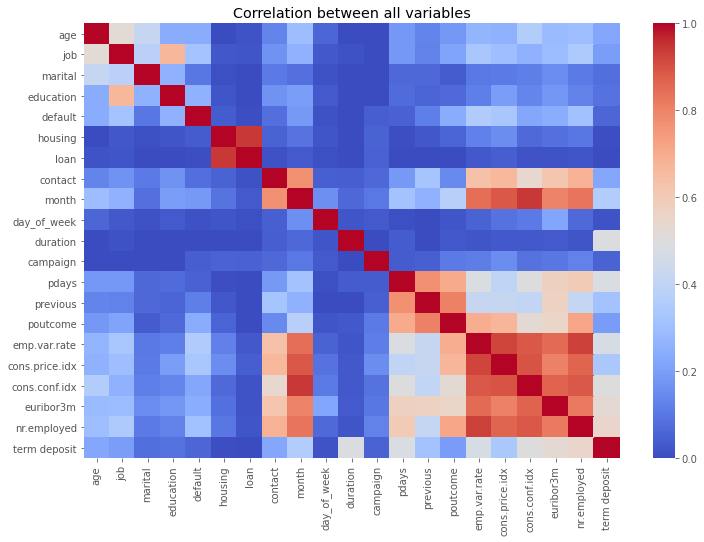

In [54]:
sns.heatmap(corr_phik, cmap='coolwarm')
plt.title('Correlation between all variables')
plt.show()

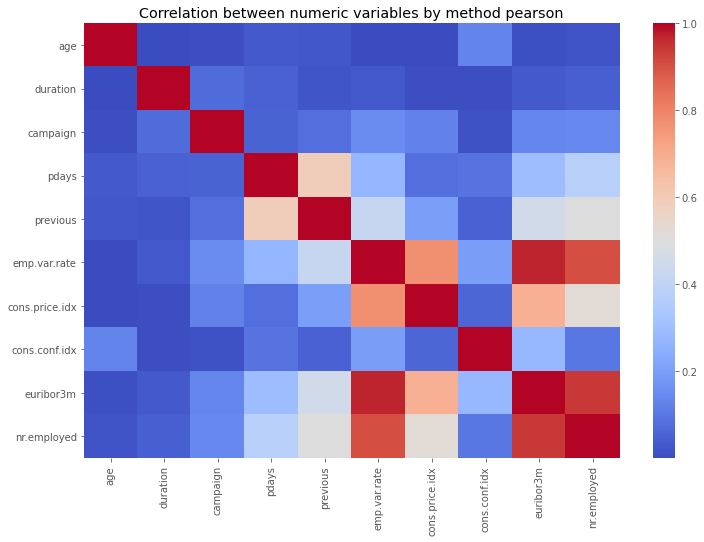

In [55]:
sns.heatmap(data.corr().abs(), cmap='coolwarm')
plt.title('Correlation between numeric variables by method pearson')
plt.show()

Observation:

- As we can see on both correlation plot, same variables are highly corelate each other. Later varaibles will be remove.

In [56]:
def corr_to_drop(corr_matrix, treshold):
    # Select upper triangle of correlation matrix
    matrix_non_duplicates = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                                    k=1).astype(np.bool))
    # Find features with correlation greater than 0.9
    return [column for column in matrix_non_duplicates.columns if any(
        matrix_non_duplicates[column] > treshold)]

def corr_sorted(data_corelate, number):
    # Filter data 
    corr_filter = data_corelate[(data_corelate >= number) & (data_corelate != 1)]
    # Display sorted data
    corr_sort = corr_filter.unstack().sort_values(ascending=False).drop_duplicates().dropna()
    return corr_sort

In [57]:
print(corr_sorted(corr_phik, 0.9),
      f'\n\nData variables to drop due to high' +
      f' correlation: {corr_to_drop(corr_phik, 0.9)}')

loan            housing         0.943147
cons.conf.idx   month           0.942669
nr.employed     emp.var.rate    0.929844
cons.price.idx  emp.var.rate    0.921977
dtype: float64 

Data variables to drop due to high correlation: ['loan', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']


Observation:

- We may remove one from highly correlated variables. During testing model we try predict with both features and with removed one of this freatures

In [58]:
corr_update()
data.phik_matrix(interval_cols=num_col_names)['term deposit'].sort_values(
    ascending=False)

term deposit      1.000000
nr.employed       0.547178
euribor3m         0.529597
cons.conf.idx     0.501193
duration          0.489394
pdays             0.488128
emp.var.rate      0.474448
month             0.357098
cons.price.idx    0.336131
previous          0.314234
contact           0.225206
age               0.224248
job               0.195808
poutcome          0.195178
education         0.089572
marital           0.081401
default           0.059741
campaign          0.052260
day_of_week       0.018948
housing           0.005695
loan              0.000000
Name: term deposit, dtype: float64

Observations:

- There is couple of features that have very low correlation, so this feature will be removed and compare model with and without.

## Feature engineering

### Convert categorical features by method LabelEncoder<br />
We have two value in feature term deposit: yes and no. In this way the best encoder will be LabelEncoder from libraries scikit-learn

In [59]:
label_encoder = LabelEncoder()
data['term deposit'] = label_encoder.fit_transform(data['term deposit'])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Check correcation between numeric data and output

In [60]:
data.corr()['term deposit'].sort_values(ascending=False)

term deposit      1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: term deposit, dtype: float64

Observations:

- Thanks to covert output to numeric feature, we check correlation by method corr() with out output

- Half of our present numeric feature is negatively correlated, what means, when output increase (1) then features descrease.

### Logarithm data<br />
Due tu right skewed data, we have to try transform data to receive normal distribution. As we saw on plot, thaks to logarithm feature age, we receive normal distibution

In [61]:
data['age'] = np.log(data['age'])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,4.025352,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,4.043051,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,3.610918,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,3.688879,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4.025352,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Converting numeric feature<br />
We convert consumer confidence index to receive absolute value from data. This index always is above 0, so we should convert this data to feature has value above 0. We use method abs to do this.

In [62]:
data['cons.conf.idx'] = data['cons.conf.idx'].apply(lambda x: abs(x))
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit
0,4.025352,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0
1,4.043051,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0
2,3.610918,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0
3,3.688879,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0
4,4.025352,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0


### Remove outliers<br />
Base on plot 'Comparison contact from previous campaign and this campaign' change no matter value to 15 because all value above 15 has response no for term deposit.

In [63]:
data['campaign'] = data['campaign'].apply(lambda x: 16 if x > 15 else x)

In [64]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 14, 15],
      dtype=int64)

Now quick check how many features are categorical in this moment

In [65]:
data.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

## Completing a categorical discrete features<br />
Due to highly correcaltion between this variables, this data will fill together

In [66]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [67]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [68]:
data[data['education']=='unknown'][['job', 'education']].value_counts()

job            education
blue-collar    unknown      454
admin.         unknown      249
technician     unknown      212
student        unknown      167
services       unknown      150
unknown        unknown      131
management     unknown      123
retired        unknown       98
entrepreneur   unknown       57
housemaid      unknown       42
self-employed  unknown       29
unemployed     unknown       19
dtype: int64

In [69]:
corr_phik['education'].sort_values(ascending=False).head(5)

education    1.000000
job          0.671554
default      0.259930
marital      0.254331
age          0.241137
Name: education, dtype: float64

Job and education are grouped and will choosen most common value for each groups to fill unknown.
If education and job are unknown, then this field will be fill by most common value in this column.

In [70]:
grouped_job = data.groupby(['education','job'])['age'].count()
grouped_education = data.groupby(['job','education'])['age'].count()

In [71]:
def fill_job_or_education(col, group):
    # col[0] and col[1] means columns job and education, depends on what we 
    # write first
    if col[0]=='unknown' and col[1]=='unknown':
        return group.idxmax()[1]
    elif col[0]!='unknown':
        return col[0]
    else:
        return group[col[1]].idxmax()

In [72]:
data['job fill'] = data[['job', 'education']].apply(fill_job_or_education,
                                            group=grouped_job,axis=1)
data['education fill'] = data[['education', 'job']].apply(fill_job_or_education, 
                                            group=grouped_education, axis=1)

In [73]:
data[data['job']=='unknown'][['job', 'education', 
                                'job fill', 'education fill']].head(20)

,job,education,job fill,education fill
29,unknown,university.degree,admin.,university.degree
35,unknown,basic.4y,blue-collar,basic.4y
73,unknown,unknown,admin.,university.degree
91,unknown,unknown,admin.,university.degree
144,unknown,high.school,admin.,high.school
299,unknown,unknown,admin.,university.degree
303,unknown,unknown,admin.,university.degree
343,unknown,unknown,admin.,university.degree
388,unknown,unknown,admin.,university.degree
428,unknown,unknown,admin.,university.degree


Our function work great, in dataframe we can see comaprison old and new fill features

In [74]:
data['education fill'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

We can now convert education fill by creating new numeric feature (ordinal data).
We can also convert job by OneHotEncoder method (nominal data).

In [75]:
data['education'] = data['education fill'].map({'basic.4y': 0,'basic.6y': 1,
                                'basic.9y': 2, 'high.school': 3,'illiterate': 4,
                                'professional.course': 5,'university.degree': 6})

In [76]:
data['job fill'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

### Completing next categorical feature<br />
Fill unknown fields in marital by most common value.

In [77]:
data[data['marital']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit,job fill,education fill
40,4.060443,management,unknown,6,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,management,university.degree
390,4.077537,retired,unknown,6,unknown,no,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,retired,university.degree
413,4.043051,retired,unknown,0,no,no,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,retired,basic.4y
1493,3.496508,services,unknown,3,no,yes,yes,telephone,may,thu,...,0,nonexistent,1.1,93.994,36.4,4.855,5191.0,0,services,high.school
1608,3.465736,unknown,unknown,6,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,36.4,4.855,5191.0,1,admin.,university.degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,3.433987,entrepreneur,unknown,6,no,no,no,cellular,oct,thu,...,0,nonexistent,-3.4,92.431,26.9,0.722,5017.5,1,entrepreneur,university.degree
38579,3.433987,entrepreneur,unknown,6,no,yes,no,telephone,oct,thu,...,1,failure,-3.4,92.431,26.9,0.722,5017.5,0,entrepreneur,university.degree
39322,3.401197,technician,unknown,6,no,no,no,cellular,mar,mon,...,2,success,-1.8,93.369,34.8,0.639,5008.7,1,technician,university.degree
39323,3.401197,technician,unknown,6,no,no,no,cellular,mar,mon,...,2,success,-1.8,93.369,34.8,0.639,5008.7,1,technician,university.degree


In [78]:
data['marital'] = data['marital'].apply(lambda x: 
                                        data['marital'].value_counts().idxmax() 
                                        if x=='unknown' else x)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term deposit,job fill,education fill
0,4.025352,housemaid,married,0,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,housemaid,basic.4y
1,4.043051,services,married,3,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,services,high.school
2,3.610918,services,married,3,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,services,high.school
3,3.688879,admin.,married,1,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,admin.,basic.6y
4,4.025352,services,married,3,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,36.4,4.857,5191.0,0,services,high.school


We can transform marital feature by OneHotEncoder.

### Transform features by OneHotEncoding.
Now we can transform categorical feature by function onehotencoding from scikit-learn library.

During the test model, we tried different method of converting feature month, the best method for model is OneHotEncoder. 

In [79]:
categories = ['month', 'contact', 'marital', 'job fill']

In [80]:
ohe = OneHotEncoder(drop='first', sparse=False).fit(data[categories])

In [81]:
data_category_transformed = pd.DataFrame(ohe.transform(data[categories]),
    columns = ohe.get_feature_names(input_features=categories),
    index = data.index)

In [82]:
data = pd.concat([data.drop(categories, axis = 1), data_category_transformed], 
               axis = 1)

In [83]:
data.head()

,age,job,education,default,housing,loan,day_of_week,duration,campaign,pdays,...,job fill_blue-collar,job fill_entrepreneur,job fill_housemaid,job fill_management,job fill_retired,job fill_self-employed,job fill_services,job fill_student,job fill_technician,job fill_unemployed
0,4.025352,housemaid,0,no,no,no,mon,261,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.043051,services,3,unknown,no,no,mon,149,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.610918,services,3,no,yes,no,mon,226,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.688879,admin.,1,no,no,no,mon,151,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.025352,services,3,no,no,yes,mon,307,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now quick check how many features are categorical in this moment

In [84]:
data.select_dtypes('object').columns

Index(['job', 'default', 'housing', 'loan', 'day_of_week', 'poutcome',
       'education fill'],
      dtype='object')

### Converting next a categorical feature<br />
We can convert feature month poutcome as ordinal data.

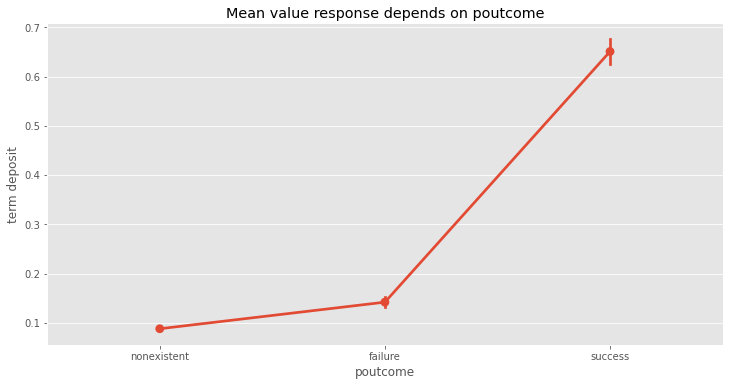

In [85]:
sns.catplot(x='poutcome', y='term deposit', data=data, kind='point', aspect=2)
plt.title('Mean value response depends on poutcome')
plt.show()

As we can see at the plot, response to subsribe term deposit is directly proportional to poutcome (nonexistmnt>failure>success). Thanks to this, we can change this data like ordinal

In [86]:
data['poutcome'] = data['poutcome'].map({'nonexistent': 0, 'failure': 1, 
                                        'success': 2})
data.head()

,age,job,education,default,housing,loan,day_of_week,duration,campaign,pdays,...,job fill_blue-collar,job fill_entrepreneur,job fill_housemaid,job fill_management,job fill_retired,job fill_self-employed,job fill_services,job fill_student,job fill_technician,job fill_unemployed
0,4.025352,housemaid,0,no,no,no,mon,261,1,999,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.043051,services,3,unknown,no,no,mon,149,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.610918,services,3,no,yes,no,mon,226,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.688879,admin.,1,no,no,no,mon,151,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.025352,services,3,no,no,yes,mon,307,1,999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Correcting by dropping feature<br />

We check how many values in this feature is NaN.

In [87]:
data['default'].value_counts()/len(data)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

In [88]:
(data['pdays'].value_counts()/len(data)).head()

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
Name: pdays, dtype: float64

As we can see, above 20 % in this feature default is unknown, so we can drop this column. In feature pdays we have 96% value, what it means that client was not previously contacted. Also we can drop it.

Now we drop all unnecessary features by drop.

In [89]:
data.drop(['default', 'day_of_week', 'job', 'education fill', 'pdays', 
           'duration', 'loan', 'housing'], axis=1, inplace=True)

We can check all decoded binary columns, how varied data are. If one of this value occurs more than 97%, we can reject this feature. Reason of this decision is that the small part of this data (3%) can cause error for our model. Thanks to function below we can find this columns and remove it from our dataset. 

In [90]:
def drop_column_binary(treshold=0.03):
    to_drop = [column for column in data if set(data[column]) == {0,1} and 
               column != 'term deposit']
    to_drop = [column for column in to_drop if data[column].mean() > 0.97 or 
                data[column].mean() < treshold]
    return to_drop

print(f'Data to drop: {drop_column_binary()}')

Data to drop: ['month_dec', 'month_mar', 'month_oct', 'month_sep', 'job fill_housemaid', 'job fill_student', 'job fill_unemployed']


In [91]:
data.drop(drop_column_binary(), axis=1, inplace=True)

We can check also variables which are highly correcteg between each other. It also can make error for model, so we should remove one one this variable.

In [92]:
print(corr_sorted(data.corr().abs(), 0.94))

euribor3m    emp.var.rate    0.972245
nr.employed  euribor3m       0.945154
dtype: float64


In [93]:
data.drop(corr_to_drop(data.corr().abs(), 0.94), axis=1, inplace=True)

The next step, we check correcation with term deposit and remove lowest, because this variables don't have affect to our output.

In [94]:
lowest_corr_term = data.corr().abs()['term deposit']
lowest_corr_term = lowest_corr_term[lowest_corr_term < 0.01].keys().to_list()
lowest_corr_term

['age',
 'month_aug',
 'month_jun',
 'job fill_management',
 'job fill_self-employed',
 'job fill_technician']

Feature age has infuence to output (checked during testing model), due to we don't remove this feature.

In [95]:
data.drop(['job fill_management', 
           'job fill_self-employed', 'job fill_technician', 
           'month_aug', 'month_jun'], axis=1, inplace=True)

All of our data is numeric so we can check heatmap by method corr()

In [96]:
data.select_dtypes('object').columns

Index([], dtype='object')

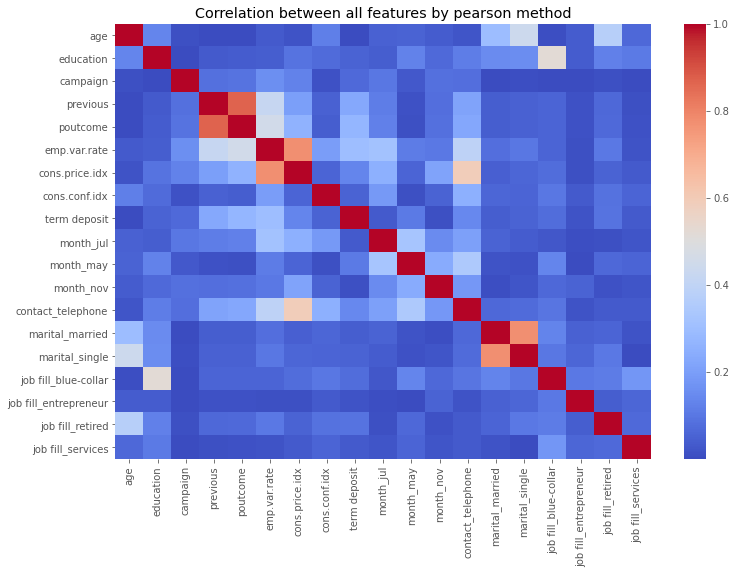

In [97]:
sns.heatmap(data.corr().abs(), cmap='coolwarm')
plt.title('Correlation between all features by pearson method')
plt.show()

In [98]:
data.head()

,age,education,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,term deposit,month_jul,month_may,month_nov,contact_telephone,marital_married,marital_single,job fill_blue-collar,job fill_entrepreneur,job fill_retired,job fill_services
0,4.025352,0,1,0,0,1.1,93.994,36.4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.043051,3,1,0,0,1.1,93.994,36.4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.610918,3,1,0,0,1.1,93.994,36.4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.688879,1,1,0,0,1.1,93.994,36.4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.025352,3,1,0,0,1.1,93.994,36.4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model predict and solve<br />
Now we are ready to train a model and predict the required solution. Our problem is a classification problem. We want to identify relationship between output (term deposit) with other variables or features. We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- Random Forest
- Support Vector Machines

First of all we should divide data to X, y to train and test data. We should do because our model is trained all time on train data. After training we can check our predict on test data. If we have only one data, our prediction will not be a reliable. So now we divide our data to train and test

In [99]:
X = data.drop(['term deposit'], axis=1)
y = data['term deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

We can standarize data. Without standarize model base on logistic regression has little worse results.

In [100]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

### Logistic Regression<br />
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [101]:
result = ''
the_best_result = ''
class Modeling:
    """Modeling and presentation of results"""
    
    def __init__(self, model, X_train, X_test, title, pca=False):
        """Inicjalization"""
        
        self.model = model
        self.title = title
        self.X_sample = X_train
        self.y_sample = y_train
        self.X_test = X_test
        self.pca = pca
        self.result = ''
        
    def sample(self, sampling):
        self.sample = sampling
        self.X_sample, self.y_sample = self.sample.fit_sample(
            self.X_sample, self.y_sample)

    def fit_predict(self):
        """Function to train, predict our model and create roc curve"""
        self.classifier = self.model
        self.classifier.fit(self.X_sample, self.y_sample)
        self.y_pred = self.classifier.predict(self.X_test)
        self.y_pred_proba = self.classifier.predict_proba(self.X_test)[:, 1]
        if self.pca:
            self.y_train_proba = self.classifier.predict_proba(X_train_pca)[:, 1]
        else:
            self.y_train_proba = self.classifier.predict_proba(X_train)[:, 1]

        
        self.fpr_train, self.tpr_train, self.thr_train = roc_curve(
            y_train, self.y_train_proba)
        self.fpr, self.tpr, self.thr = roc_curve(y_test, self.y_pred_proba)
        

    def print_results(self):
        """Function to print our result"""
        self.accuracy = round(accuracy_score(y_test, self.y_pred), 4)
        self.f1 = round(f1_score(y_test, self.y_pred), 4)
        self.recall = round(recall_score(y_test, self.y_pred), 4)
        self.log_loss = round(log_loss(y_test, self.y_pred_proba), 4)
        
        print(f'Results for {self.title}:')
        print(f'{self.title} accuracy: {self.accuracy}')
        print(f'{self.title} f-score: {self.f1}')
        print(f'{self.title} recall: {self.recall}')
        print(f'{self.title} log_loss: {self.log_loss}')

    def add_to_table(self):
        """Function to add our result to dataframe to compare all"""
        global result
        if len(result) == 0:
            result  = {self.title: [self.accuracy, self.f1, self.recall, 
                                    self.log_loss]}
            result = pd.DataFrame(result, index=['Accuracy', 'F-score', 
                                                 'Recall', 'Log_loss'])
        else:
            conact = {self.title: [self.accuracy, self.f1, self.recall, 
                                   self.log_loss]}
            conact = pd.DataFrame(conact, index=['Accuracy', 'F-score', 
                                                 'Recall', 'Log_loss'])
            result = pd.concat([result, conact], axis=1) 

    def plot_confusion_matrix(self):
        """plot confusion matrix"""
        plt.figure(figsize=(10,10), facecolor='w')
        sns.heatmap(confusion_matrix(y_test, self.y_pred), annot=True, fmt='.0f', 
                    cbar=False, vmax=confusion_matrix(y_test, self.y_pred).max(), 
                    vmin=0, cmap='Blues')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title(f'Confusion matrix for {self.title}')
    
    def plot_confusion_matrix_percent(self):
        """Plot confusion matrix with part of 1 value"""
        plt.figure(figsize=(10,10), facecolor='w')
        cm = confusion_matrix(y_test, self.y_pred)
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        df_cm = pd.DataFrame(cm_norm)
        sns.heatmap(df_cm, annot=True, cmap="Blues", cbar=False)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title(f'Confusion matrix for {self.title}')

In [102]:
def subplots_curve(fpr_1_train, tpr_1_train, title_1_train, 
                   fpr_1_test, tpr_1_test, title_1_test,
                   fpr_2_train, tpr_2_train, title_2_train, 
                   fpr_2_test, tpr_2_test, title_2_test):
    """Subplots for ROC curve"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 15), facecolor='w')

    ax1.plot(fpr_1_train,tpr_1_train, color='blue', 
             label=f'ROC curve {auc(fpr_1_train, tpr_1_train)}')
    ax1.plot([0,1], [0,1], 'k--')
    ax1.set_title(title_1_train)
    ax1.legend(loc="lower right")

    ax2.plot(fpr_2_train, tpr_2_train, color='red', 
             label=f'ROC curve {auc(fpr_2_train, tpr_2_train)}')
    ax2.plot([0,1], [0,1], 'k--')
    ax2.set_title(title_2_train)
    ax2.legend(loc="lower right")
    
    ax3.plot(fpr_1_test,tpr_1_test, color='blue', 
             label=f'ROC curve {auc(fpr_1_test, tpr_1_test)}')
    ax3.plot([0,1], [0,1], 'k--')
    ax3.set_title(title_1_test)
    ax3.legend(loc="lower right")
    
    ax4.plot(fpr_2_test, tpr_2_test, color='red', 
             label=f'ROC curve {auc(fpr_2_test, tpr_2_test)}')
    ax4.plot([0,1], [0,1], 'k--')
    ax4.set_title(title_2_test)
    ax4.legend(loc="lower right")

We can try, thanks to Grid Search CV we can choose the best parameters for model base on logistic regresion. After that, we also try model base on default parameters for logistic regression and we can choose better option.

In [103]:
log_reg_set_param = LogisticRegression()
log_reg_param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']}
log_reg_search = GridSearchCV(log_reg_set_param, param_grid=log_reg_param, scoring='f1')

# fitting the model for grid search 
log_reg_search.fit(X_train, y_train)

print(f'The best parameters: {log_reg_search.best_params_}')

The best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Results for Logistic Regression:
Logistic Regression accuracy: 0.8954
Logistic Regression f-score: 0.2798
Logistic Regression recall: 0.182
Logistic Regression log_loss: 0.2855
----------------------------------------
Results for Logistic Regression with param:
Logistic Regression with param accuracy: 0.8954
Logistic Regression with param f-score: 0.2797
Logistic Regression with param recall: 0.182
Logistic Regression with param log_loss: 0.2855


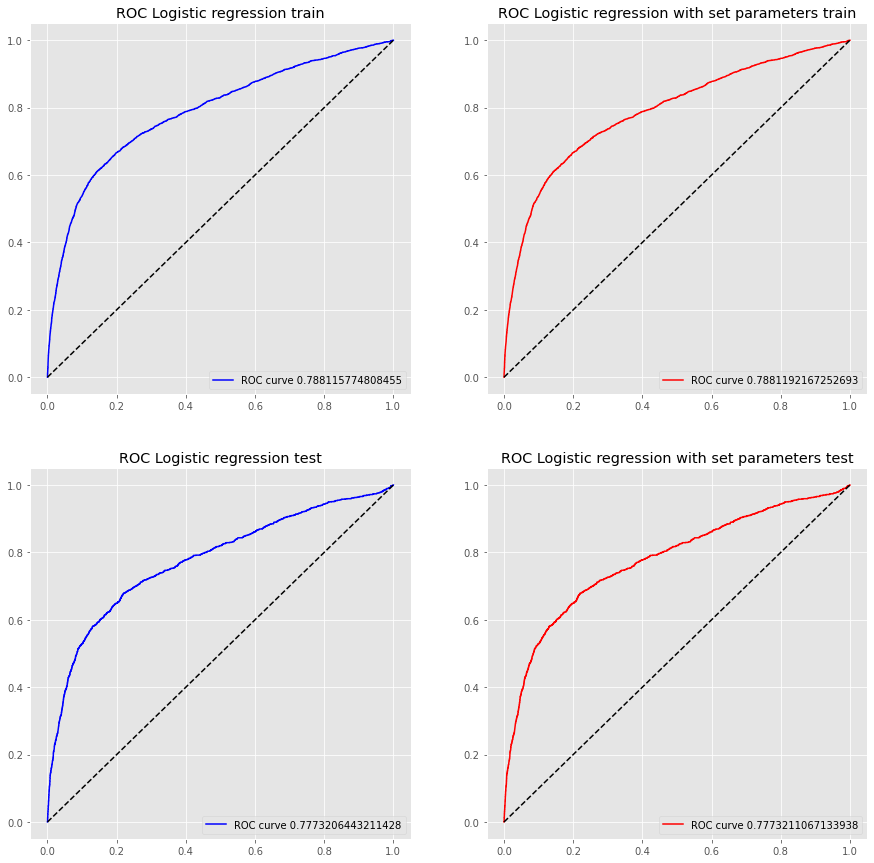

In [104]:
# Logistic Regression

# default parameters 
log_reg = Modeling(LogisticRegression(solver='liblinear'), 
                   X_train, X_test, 
                   'Logistic Regression')
log_reg.fit_predict()
log_reg.print_results()
print('-'*40)

# the best parameters from Grid Search CV
log_reg_param = Modeling(LogisticRegression(
                                penalty=log_reg_search.best_params_['penalty'],
                                C=log_reg_search.best_params_['C'], 
                                solver=log_reg_search.best_params_['solver']),
                         X_train, X_test,  
                         'Logistic Regression with param')
log_reg_param.fit_predict()
log_reg_param.print_results()

subplots_curve(fpr_1_train=log_reg.fpr_train, tpr_1_train=log_reg.tpr_train,
               title_1_train='ROC Logistic regression train', 
               fpr_1_test=log_reg.fpr, tpr_1_test=log_reg.tpr, 
               title_1_test='ROC Logistic regression test',
               fpr_2_train=log_reg_param.fpr_train, tpr_2_train=log_reg_param.tpr_train, 
               title_2_train='ROC Logistic regression with set parameters train',
               fpr_2_test=log_reg_param.fpr, tpr_2_test=log_reg_param.tpr, 
               title_2_test='ROC Logistic regression with set parameters test')

log_reg.add_to_table()

Observations:

- Default setting for parameters give us the same result like the best choosen parameters.

- Base accuracy (all response the same like output == 'no') is 88%. In our model accuracy is 91%, what it means we have better model.

- As we can see, on train and test dataset, model works similar, so it isn't overfited or underfitted.

- F-score is the same for both model

- ROC curve (also great measure for imbalanced data) can efficiently give us the score that how our model is performing in classifing the labels. The best ROC is 1. We have 0.93 so it is great (all above black line is better) 

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [105]:
list_col = [col for col in data.columns if col != 'term deposit']
coeff_df = pd.DataFrame(list_col)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log_reg.classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,cons.price.idx,0.692342
4,poutcome,0.277350
16,job fill_retired,0.089689
8,month_jul,0.038767
13,marital_single,0.032228
1,education,0.024581
12,marital_married,0.004611
15,job fill_entrepreneur,-0.017538
0,age,-0.052548
17,job fill_services,-0.083188


Observations:

- Cons.price.idx is highest positivie coefficient, the higher the value, the more likely the answer is yes.

- Inversely as emp.var.rate increases, probability of response yes decreases the most.

## Resampling Technique<br />
Due to highly imbalanced data, now we can try deal with them. One of possibilities is resampling technique.

Resampling consists of removing samples from the majority class (under-sampling) and adding more examples from the minority class (over-sampling).
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

### Random Under-Sampling<br />

<img src="Images/undersample.png">

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Results for Logistic Regression under Sample:
Logistic Regression under Sample accuracy: 0.8104
Logistic Regression under Sample f-score: 0.4185
Logistic Regression under Sample recall: 0.6113
Logistic Regression under Sample log_loss: 0.5306


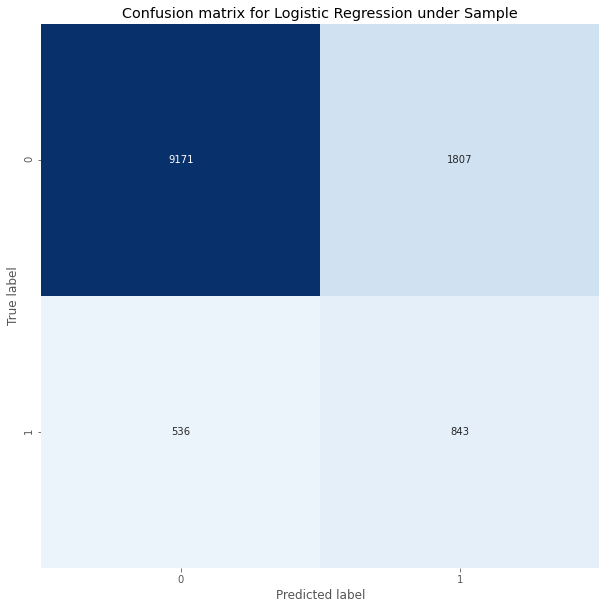

In [106]:
# Random Under-Sampling for Logistic Regression

log_reg_undersample = Modeling(LogisticRegression(solver='liblinear'),
                               X_train, X_test, 
                              'Logistic Regression under Sample')
log_reg_undersample.sample(RandomUnderSampler(
    sampling_strategy='majority', random_state=1))
log_reg_undersample.fit_predict()
log_reg_undersample.print_results()
log_reg_undersample.plot_confusion_matrix()
log_reg_undersample.add_to_table()

### Synthetic Minority Oversampling Technique (SMOTE)<br />
This technique generates synthetic data for the minority class.

<img src="smote.png">

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

Results for Logistic Regression SMOTE:
Logistic Regression SMOTE accuracy: 0.8087
Logistic Regression SMOTE f-score: 0.4172
Logistic Regression SMOTE recall: 0.6135
Logistic Regression SMOTE log_loss: 0.5299


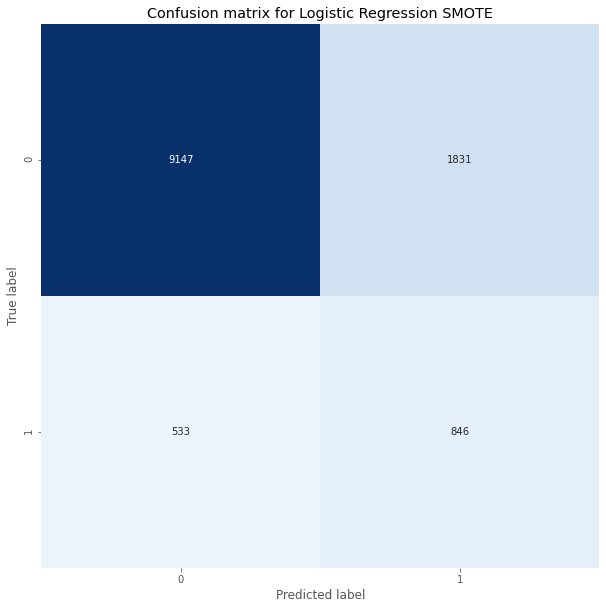

In [107]:
# SMOTE for Logistic Regression

log_reg_smote = Modeling(LogisticRegression(solver='liblinear'), 
                         X_train, X_test,
                         'Logistic Regression SMOTE')
log_reg_smote.sample(SMOTE(sampling_strategy='minority'))
log_reg_smote.fit_predict()
log_reg_smote.print_results()
log_reg_smote.plot_confusion_matrix()
log_reg_smote.add_to_table()

### Under-sampling: Tomek links<br />

<img src="tomek.png">

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Results for Logistic Regression TomekLinks:
Logistic Regression TomekLinks accuracy: 0.8948
Logistic Regression TomekLinks f-score: 0.3428
Logistic Regression TomekLinks recall: 0.2458
Logistic Regression TomekLinks log_loss: 0.286


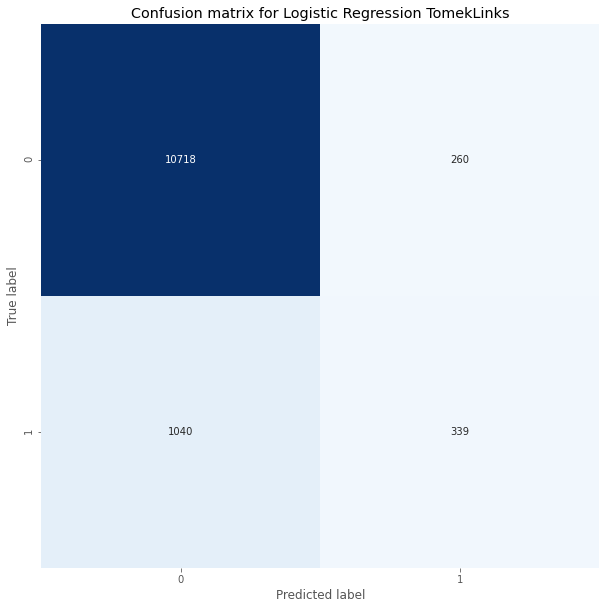

In [108]:
# Tomek links for Logistic Regression

log_reg_tomek_link = Modeling(LogisticRegression(solver='liblinear'),
                              X_train, X_test,
                              'Logistic Regression TomekLinks')
log_reg_tomek_link.sample(TomekLinks(sampling_strategy='majority'))
log_reg_tomek_link.fit_predict()
log_reg_tomek_link.print_results()
log_reg_tomek_link.plot_confusion_matrix()
log_reg_tomek_link.add_to_table()

### Over-sampling followed by under-sampling<br />
Now, we try combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques.

Results for Logistic Regression SMOTETomek:
Logistic Regression SMOTETomek accuracy: 0.8059
Logistic Regression SMOTETomek f-score: 0.4159
Logistic Regression SMOTETomek recall: 0.6193
Logistic Regression SMOTETomek log_loss: 0.5296


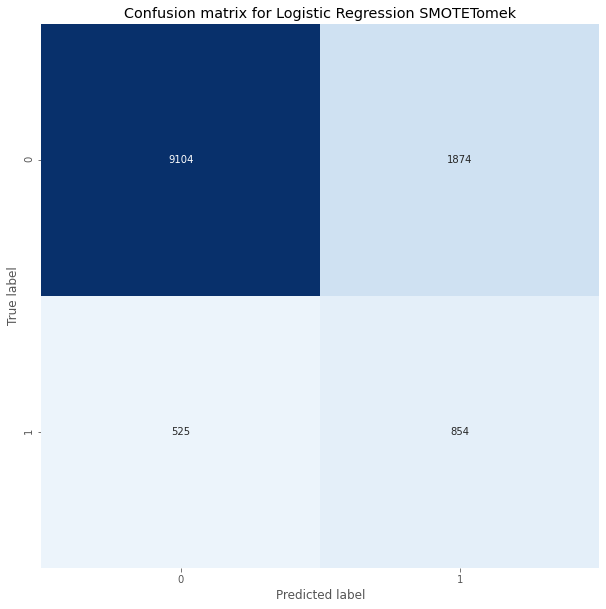

In [109]:
# SMOTE Tomek for Logistic Regression

log_reg_smote_t = Modeling(LogisticRegression(solver='liblinear'), 
                           X_train, X_test,
                           'Logistic Regression SMOTETomek')
log_reg_smote_t.sample(SMOTETomek(sampling_strategy='auto'))
log_reg_smote_t.fit_predict()
log_reg_smote_t.print_results()
log_reg_smote_t.plot_confusion_matrix()
log_reg_smote_t.add_to_table()

In [110]:
result.index.name = 'Classifier'
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression TomekLinks,0.8948,0.3428,0.2458,0.2860
Logistic Regression,0.8954,0.2798,0.1820,0.2855


Observations:

- Used sampling method proved to be right, because all of these methods are better that without sampling

- Tree methods are similar: basic under sample, smote and combination smote and tomek links.

### Principal Component Analysis 
Pincipal component analysis is a technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

Now we can check PCA for our model.

In [111]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

After fitting and transforing our data, check principal component.

In [112]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16871878, 0.12298779, 0.09409119, 0.08636436, 0.0759825 ,
       0.06567283, 0.06200362, 0.05702128, 0.05358525, 0.0514317 ,
       0.04232106, 0.03050809, 0.02632848, 0.0195717 , 0.01838795,
       0.01137576, 0.00733059, 0.00631709])

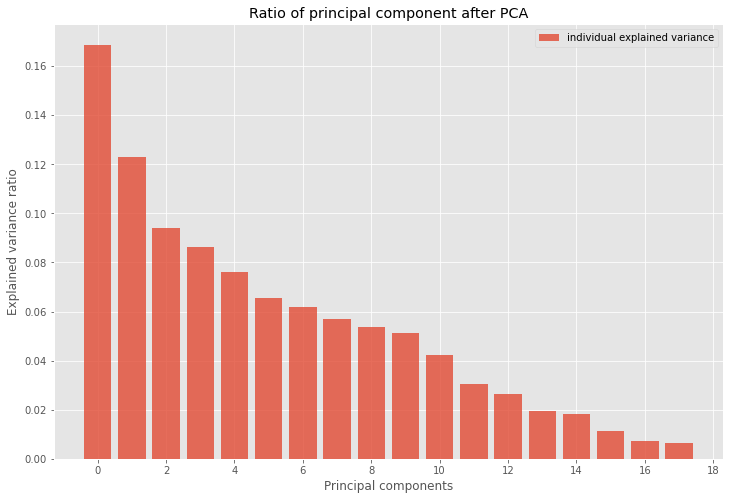

In [113]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.bar(range(18), explained_variance, alpha=0.8, align='center',
            label='individual explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_title('Ratio of principal component after PCA')
ax.legend(loc='best')
plt.show()

As we can see two last components have less than 0.01, so we can use 16 components.

In [114]:
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Check our best result from logistic regression with PCA.

Results for Logistic Regression SMOTETomek PCA:
Logistic Regression SMOTETomek PCA accuracy: 0.7871
Logistic Regression SMOTETomek PCA f-score: 0.3961
Logistic Regression SMOTETomek PCA recall: 0.6258
Logistic Regression SMOTETomek PCA log_loss: 0.5589


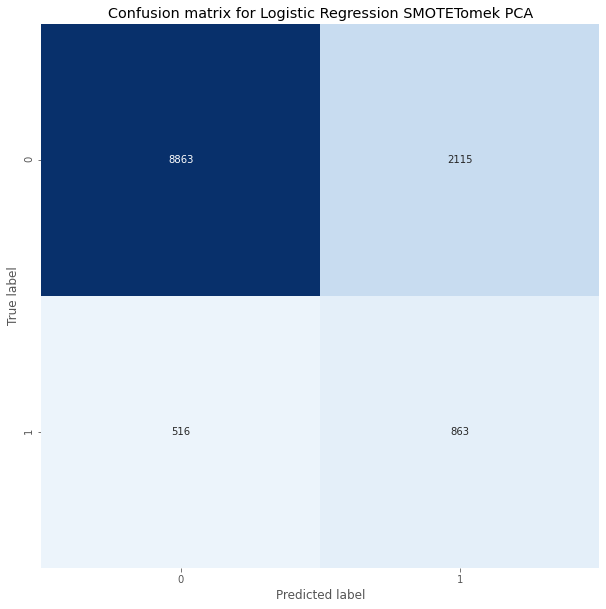

In [115]:
log_reg_smote_t_pca = Modeling(LogisticRegression(solver='liblinear'),
                           X_train_pca, X_test_pca,
                           'Logistic Regression SMOTETomek PCA', pca=True)
log_reg_smote_t_pca.sample(SMOTETomek(sampling_strategy='auto'))
log_reg_smote_t_pca.fit_predict()
log_reg_smote_t_pca.print_results()
log_reg_smote_t_pca.plot_confusion_matrix()
log_reg_smote_t_pca.add_to_table()

In [116]:
result.index.name = 'Classifier'
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression SMOTETomek PCA,0.7871,0.3961,0.6258,0.5589
Logistic Regression TomekLinks,0.8948,0.3428,0.2458,0.2860
Logistic Regression,0.8954,0.2798,0.1820,0.2855


Observation:

- Model base on PCA is one of the worst so we reject this method for our model.

### Random Forest<br />
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=50) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

Results for Random Forest:
Random Forest accuracy: 0.8787
Random Forest f-score: 0.3457
Random Forest recall: 0.2872
Random Forest log_loss: 1.0826


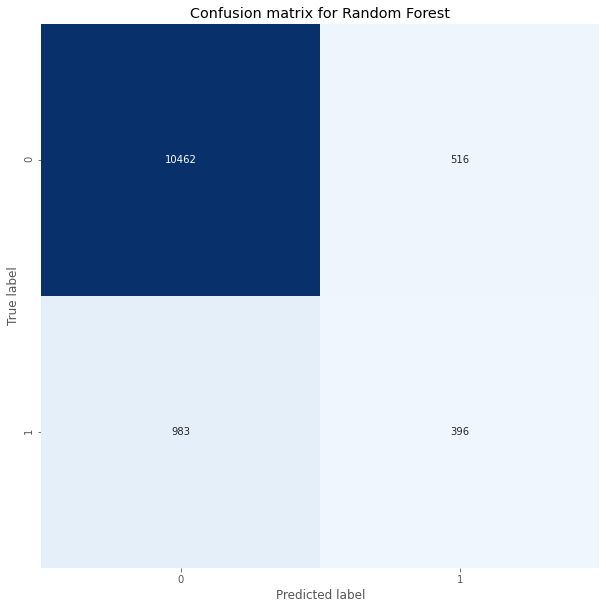

In [117]:
# Random Forest

rn_fo = Modeling(RandomForestClassifier(n_estimators=50), 
                 X_train, X_test,
                 'Random Forest')
rn_fo.fit_predict()
rn_fo.print_results()
rn_fo.plot_confusion_matrix()
rn_fo.add_to_table()

Results for Random Forest with param:
Random Forest with param accuracy: 0.8998
Random Forest with param f-score: 0.2966
Random Forest with param recall: 0.1893
Random Forest with param log_loss: 0.2778


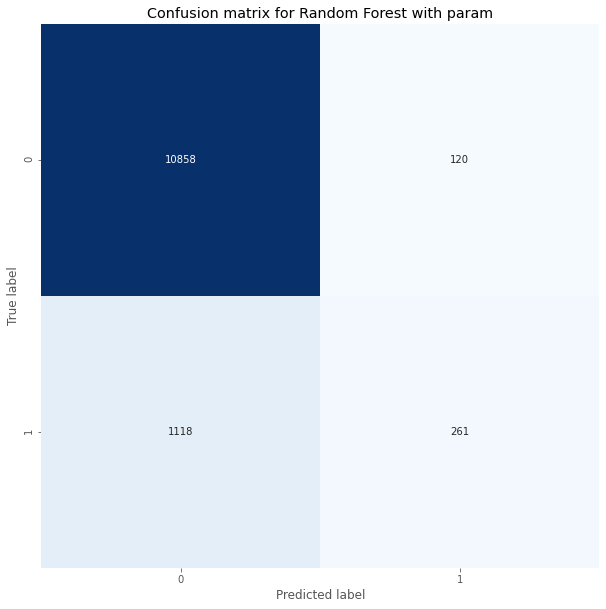

In [118]:
# Random forest with set parameters

rn_fo_param = Modeling(RandomForestClassifier(criterion='gini',
                                              max_depth=8,
                                              max_features='auto',
                                              n_estimators=10), 
                       X_train, X_test,
                       'Random Forest with param')

rn_fo_param.fit_predict()
rn_fo_param.print_results()
rn_fo_param.plot_confusion_matrix()

Observations:

- Random forest with set parameters (search by grid search cv) gave us worst results than random forest with default parameters so, we reject this method.

Now, we will use feature importance variable to see feature importance scores.

In [119]:
feature_important_result = pd.DataFrame({'feature':list_col, 
    'importance': rn_fo.classifier.feature_importances_}).sort_values(
    by='importance',ascending=False)
feature_important_result

,feature,importance
0,age,0.350387
2,campaign,0.122710
1,education,0.099390
7,cons.conf.idx,0.077225
5,emp.var.rate,0.070833
4,poutcome,0.069587
6,cons.price.idx,0.054611
3,previous,0.032278
12,marital_married,0.021328
11,contact_telephone,0.020847


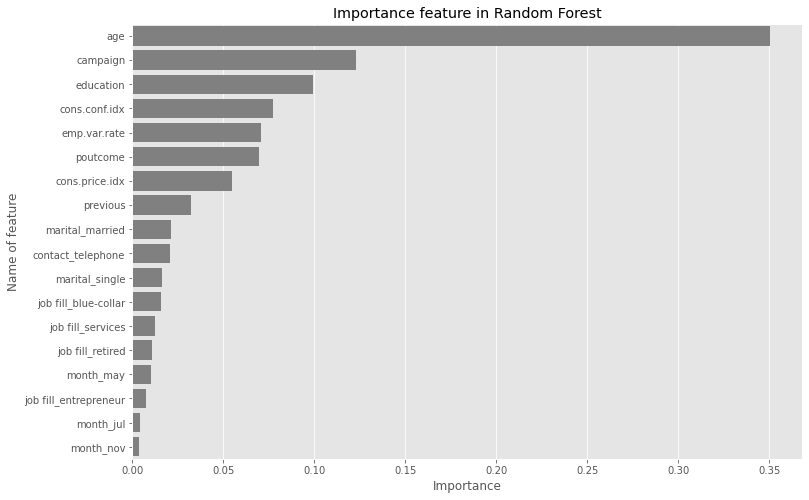

In [120]:
sns.barplot(x=feature_important_result['importance'], 
            y=feature_important_result['feature'], color='grey')
plt.title('Importance feature in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Name of feature')
plt.show()

In [121]:
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression SMOTETomek PCA,0.7871,0.3961,0.6258,0.5589
Random Forest,0.8787,0.3457,0.2872,1.0826
Logistic Regression TomekLinks,0.8948,0.3428,0.2458,0.2860
Logistic Regression,0.8954,0.2798,0.1820,0.2855


Observations:

- Random Forest (without sampling)  gives us better results than Logistic Regression (F-score, recall), so now we can check this model with sampling

- Age is highest positivie coefficient, the higher the value, the more likely the answer is yes.

- Random Forest not requires standarize of data, but during testing model, better results (a little) our model achives with the standarization. 

Results for Random Forest under Sample:
Random Forest under Sample accuracy: 0.7215
Random Forest under Sample f-score: 0.3348
Random Forest under Sample recall: 0.628
Random Forest under Sample log_loss: 1.8183


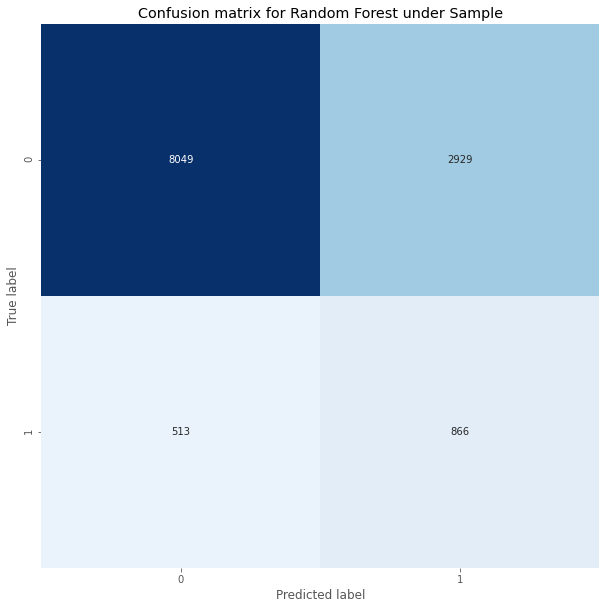

In [122]:
# Random Under-Sampling for Random Forest

rn_fo_undersample = Modeling(RandomForestClassifier(n_estimators=10), 
                             X_train, X_test,
                             'Random Forest under Sample')
rn_fo_undersample.sample(RandomUnderSampler(
    sampling_strategy='majority', random_state=1))
rn_fo_undersample.fit_predict()
rn_fo_undersample.print_results()
rn_fo_undersample.plot_confusion_matrix()
rn_fo_undersample.add_to_table()

Results for Random Forest SMOTE:
Random Forest SMOTE accuracy: 0.8611
Random Forest SMOTE f-score: 0.3554
Random Forest SMOTE recall: 0.343
Random Forest SMOTE log_loss: 1.7068


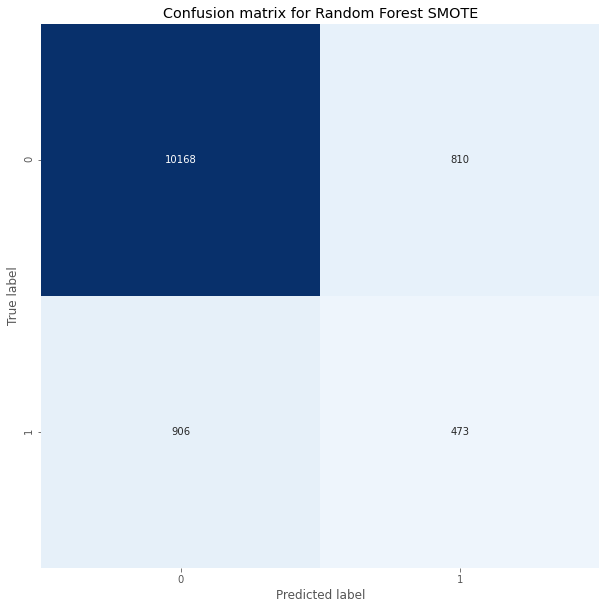

In [123]:
# Smote for Random forest

rn_fo_smote = Modeling(RandomForestClassifier(n_estimators=10),
                       X_train, X_test,
                       'Random Forest SMOTE')
rn_fo_smote.sample(SMOTE(sampling_strategy='minority'))
rn_fo_smote.fit_predict()
rn_fo_smote.print_results()
rn_fo_smote.plot_confusion_matrix()
rn_fo_smote.add_to_table()

Results for Random Forest TomekLinks:
Random Forest TomekLinks accuracy: 0.878
Random Forest TomekLinks f-score: 0.377
Random Forest TomekLinks recall: 0.3307
Random Forest TomekLinks log_loss: 1.5218


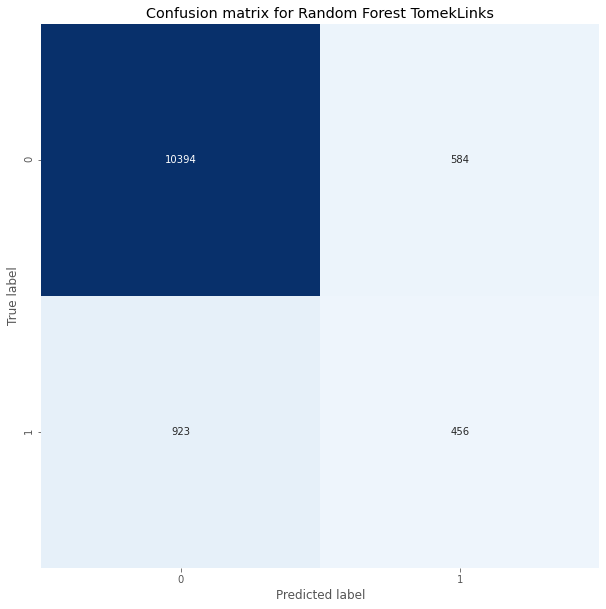

In [124]:
# Tomek Links for Random forest

rn_fo_tomek_link = Modeling(RandomForestClassifier(n_estimators=10), 
                            X_train, X_test,
                            'Random Forest TomekLinks')
rn_fo_tomek_link.sample(TomekLinks(sampling_strategy='majority'))
rn_fo_tomek_link.fit_predict()
rn_fo_tomek_link.print_results()
rn_fo_tomek_link.plot_confusion_matrix()
rn_fo_tomek_link.add_to_table()

Results for Random Forest SMOTETomek:
Random Forest SMOTETomek accuracy: 0.8572
Random Forest SMOTETomek f-score: 0.359
Random Forest SMOTETomek recall: 0.3582
Random Forest SMOTETomek log_loss: 1.6882


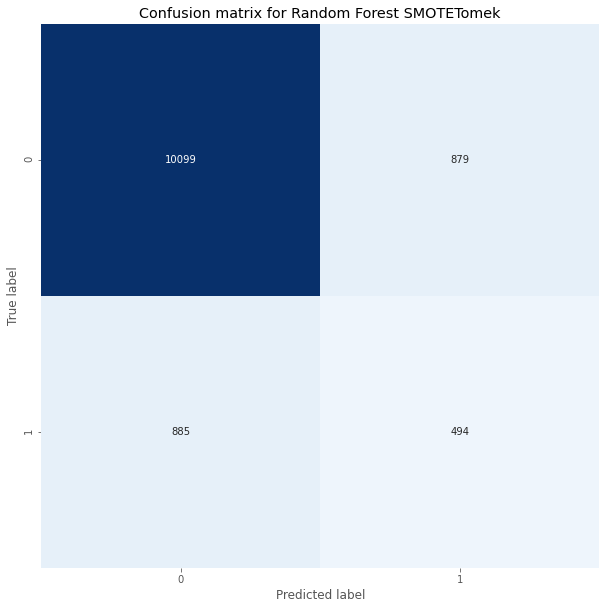

In [125]:
# SMOTE Tomek for Random forest

rn_fo_smote_t = Modeling(RandomForestClassifier(n_estimators=10),
                         X_train, X_test,
                         'Random Forest SMOTETomek')
rn_fo_smote_t.sample(SMOTETomek(sampling_strategy='auto'))
rn_fo_smote_t.fit_predict()
rn_fo_smote_t.print_results()
rn_fo_smote_t.plot_confusion_matrix()
rn_fo_smote_t.add_to_table()

In [126]:
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression SMOTETomek PCA,0.7871,0.3961,0.6258,0.5589
Random Forest TomekLinks,0.8780,0.3770,0.3307,1.5218
Random Forest SMOTETomek,0.8572,0.3590,0.3582,1.6882
Random Forest SMOTE,0.8611,0.3554,0.3430,1.7068
Random Forest,0.8787,0.3457,0.2872,1.0826
Logistic Regression TomekLinks,0.8948,0.3428,0.2458,0.2860
Random Forest under Sample,0.7215,0.3348,0.6280,1.8183


Results for Random Forest SMOTETomek PCA:
Random Forest SMOTETomek PCA accuracy: 0.8347
Random Forest SMOTETomek PCA f-score: 0.3614
Random Forest SMOTETomek PCA recall: 0.4191
Random Forest SMOTETomek PCA log_loss: 1.8288


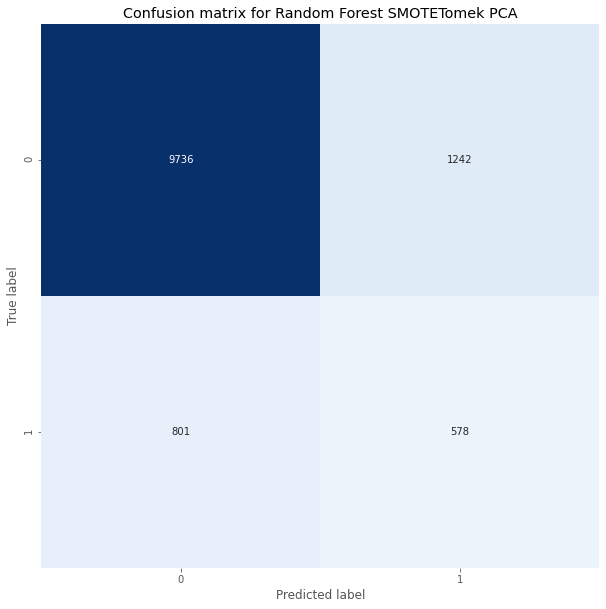

In [127]:
# SMOTE Tomek for Random forest PCA

rn_fo_smote_t_pca = Modeling(RandomForestClassifier(n_estimators=10),
                         X_train_pca, X_test_pca,
                         'Random Forest SMOTETomek PCA', pca=True)
rn_fo_smote_t_pca.sample(SMOTETomek(sampling_strategy='auto'))
rn_fo_smote_t_pca.fit_predict()
rn_fo_smote_t_pca.print_results()
rn_fo_smote_t_pca.plot_confusion_matrix()
rn_fo_smote_t_pca.add_to_table()

In [128]:
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression SMOTETomek PCA,0.7871,0.3961,0.6258,0.5589
Random Forest TomekLinks,0.8780,0.3770,0.3307,1.5218
Random Forest SMOTETomek PCA,0.8347,0.3614,0.4191,1.8288
Random Forest SMOTETomek,0.8572,0.3590,0.3582,1.6882
Random Forest SMOTE,0.8611,0.3554,0.3430,1.7068
Random Forest,0.8787,0.3457,0.2872,1.0826
Logistic Regression TomekLinks,0.8948,0.3428,0.2458,0.2860


Observations:

- Random Forest with resampling give us better results than without resampling.

- Random Forest with PCA give us a little better results than without but still Logistic Regression is better. 

- Logistic Regression with resample SMOTETomek gives us the best result (almost the same like SMOTE).

- In table we can see that we have tree similar models. They have similar measure importat for us: F-score, also recall is important. 

- In random forest standarize data also give us better results.

### SVM<br />
Support vector machines (SVM) are particular linear classifiers which are based on the margin maximization principle. They perform structural risk minimization, which improves the complexity of the classifier with the aim of achieving excellent generalization performance. The SVM accomplishes the classification task by constructing, in a higher dimensional space, the hyperplane that optimally separates the data into two categories.

Results for SVC:
SVC accuracy: 0.84
SVC f-score: 0.4531
SVC recall: 0.5939
SVC log_loss: 0.2892


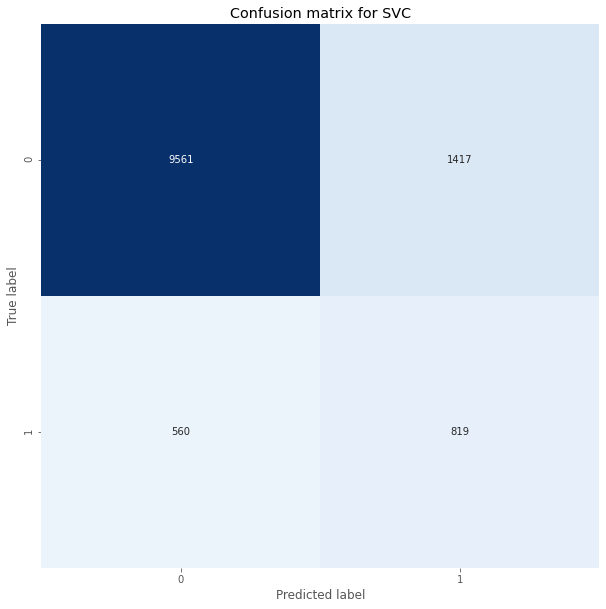

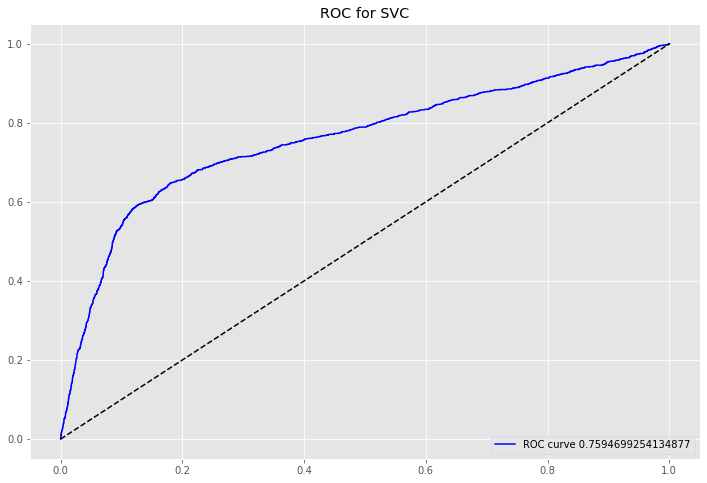

In [129]:
# SVC

svc = Modeling(SVC(class_weight='balanced', probability=True ),
               X_train, X_test,
               'SVC')
svc.fit_predict()
svc.print_results()
svc.plot_confusion_matrix()
svc.add_to_table()

# plot ROC
plt.figure(figsize=(12, 8), facecolor='w')

plt.plot(svc.fpr, svc.tpr, color='blue', label=f'ROC curve {auc(svc.fpr, svc.tpr)}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC for SVC')
plt.legend(loc="lower right")
plt.show()

Results for SVC SMOTETomek:
SVC SMOTETomek accuracy: 0.8334
SVC SMOTETomek f-score: 0.4428
SVC SMOTETomek recall: 0.5932
SVC SMOTETomek log_loss: 0.5159


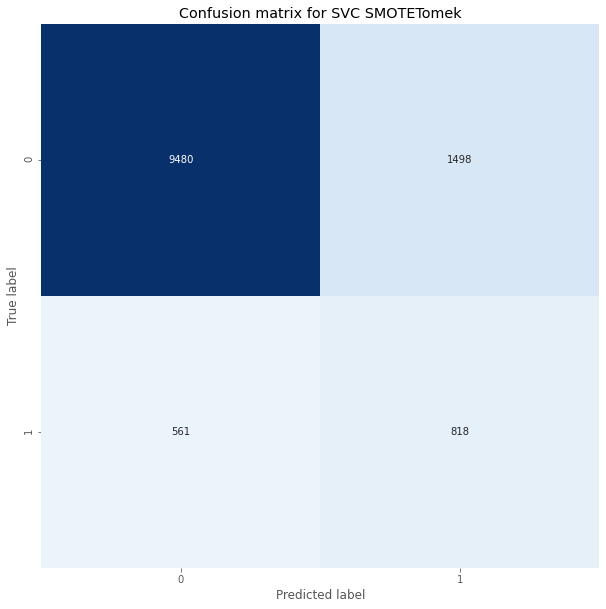

In [130]:
# SMOTE Tomek for SVC 

svc_st = Modeling(SVC(class_weight='balanced', probability=True),
                  X_train, X_test,
                  'SVC SMOTETomek')
svc_st.sample(SMOTETomek(sampling_strategy='auto'))
svc_st.fit_predict()
svc_st.print_results()
svc_st.plot_confusion_matrix()
svc_st.add_to_table()

In [131]:
result.transpose().sort_values(by='F-score', ascending=False)

Classifier,Accuracy,F-score,Recall,Log_loss
SVC,0.8400,0.4531,0.5939,0.2892
SVC SMOTETomek,0.8334,0.4428,0.5932,0.5159
Logistic Regression under Sample,0.8104,0.4185,0.6113,0.5306
Logistic Regression SMOTE,0.8087,0.4172,0.6135,0.5299
Logistic Regression SMOTETomek,0.8059,0.4159,0.6193,0.5296
Logistic Regression SMOTETomek PCA,0.7871,0.3961,0.6258,0.5589
Random Forest TomekLinks,0.8780,0.3770,0.3307,1.5218
Random Forest SMOTETomek PCA,0.8347,0.3614,0.4191,1.8288
Random Forest SMOTETomek,0.8572,0.3590,0.3582,1.6882
Random Forest SMOTE,0.8611,0.3554,0.3430,1.7068


Conclusion:

- SVC model is the best results. As we can see in table, this method has the highest F-score. We receive F1-score about 0.45.

- SVC without resample works better tham with resample.

# Summary
During creating of this analysis, we could discover information about correlation, affect to output and thanks to this we could do our model. Now, we may use our model to predict if client has subscribe term deposit base on delivered informations. It helps to bank to reduce number of employees that contact with people (greater precision in selecting customers). Our model is based on SVC. Below, one more time we can see our results for this model.

In [132]:
result.transpose().sort_values(by='F-score', ascending=False).head(1)

Classifier,Accuracy,F-score,Recall,Log_loss
SVC,0.84,0.4531,0.5939,0.2892


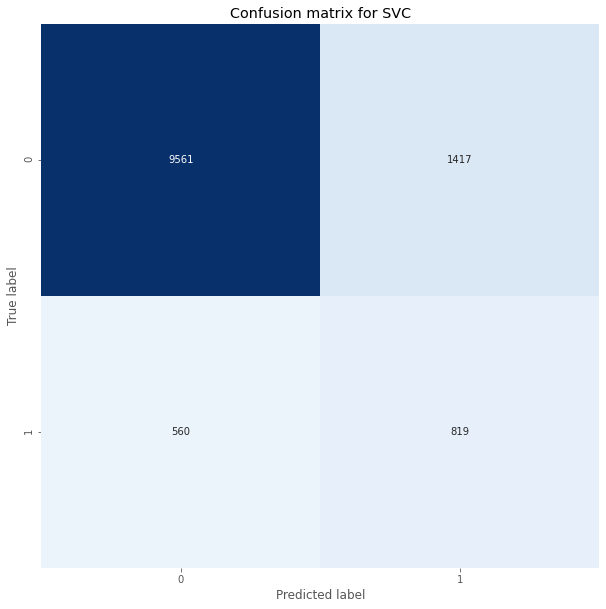

In [133]:
svc.plot_confusion_matrix()